# Exploratory Data Analysis - StackOverFlow

In [371]:
import os

In [372]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv']

In [373]:
import pandas as pd

In [374]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [375]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [376]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [377]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [378]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation & Cleaning
- Demographics of the survey respondents & the global programming community
- Distribution of programming skills, experience and preferences
- Employement-related information, preferences & opinions

In [379]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [380]:
len(selected_columns)

20

In [381]:
survey_df = survey_raw_df[selected_columns].copy()

In [382]:
schema = schema_raw[selected_columns]

In [383]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [385]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [386]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [387]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [388]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [389]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [390]:
import numpy as np

In [391]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [392]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
36265,United States,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,C#;HTML/CSS;Java;JavaScript;SQL,C#;HTML/CSS;Java;JavaScript;Python;SQL,Once every few years,Meditate;Play games;Call a coworker or friend;...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
26165,India,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,24.0,19.0,19.0,Java;JavaScript,Go;Java;JavaScript,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;DevOps specialist",NaN,Very satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Fairly important
60829,Germany,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,JavaScript;PHP;Scala;TypeScript;VBA,NaN,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
33834,India,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,19.0,7.0,2.0,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;Java;JavaScript;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",56.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
15285,India,48.0,Man,Some college/university study without earning ...,"A natural science (such as biology, chemistry,...",Yes,20.0,28.0,27.0,C#;HTML/CSS;SQL,C#;HTML/CSS;JavaScript;PHP;Python;Ruby;SQL;Typ...,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, desktop or ente...",96.0,Very satisfied,Industry that I’d be working in;Office environ...,Often: 1-2 days per week or more,Critically important
16318,United States,25.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,19.0,2.0,NaN,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, full-stack;DevOps specialist",NaN,NaN,NaN,NaN,Very important
14810,India,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,16.0,3.0,NaN,C;HTML/CSS;JavaScript,Go;JavaScript;Python;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
59395,Peru,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,7.0,19.0,7.0,C;C++;Dart;Go;HTML/CSS;JavaScript;Julia;Perl;P...,Kotlin;R;Scala;Swift,Every few months,Meditate;Call a coworker or friend;Go for a wa...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",48.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
31165,Germany,50.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,33.0,15.0,C#;JavaScript;TypeScript,C#;JavaScript;Rust;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Never,Somewhat important
58932,Australia,48.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,26.0,22.0,C;C++;HTML/CSS;JavaScript;Ruby;SQL,NaN,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",38.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Somewha

## Exploratory Analysis and Visualization

In [393]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [394]:
schema.Country

'Where do you live?'

In [395]:
survey_df.Country.nunique()

183

In [396]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

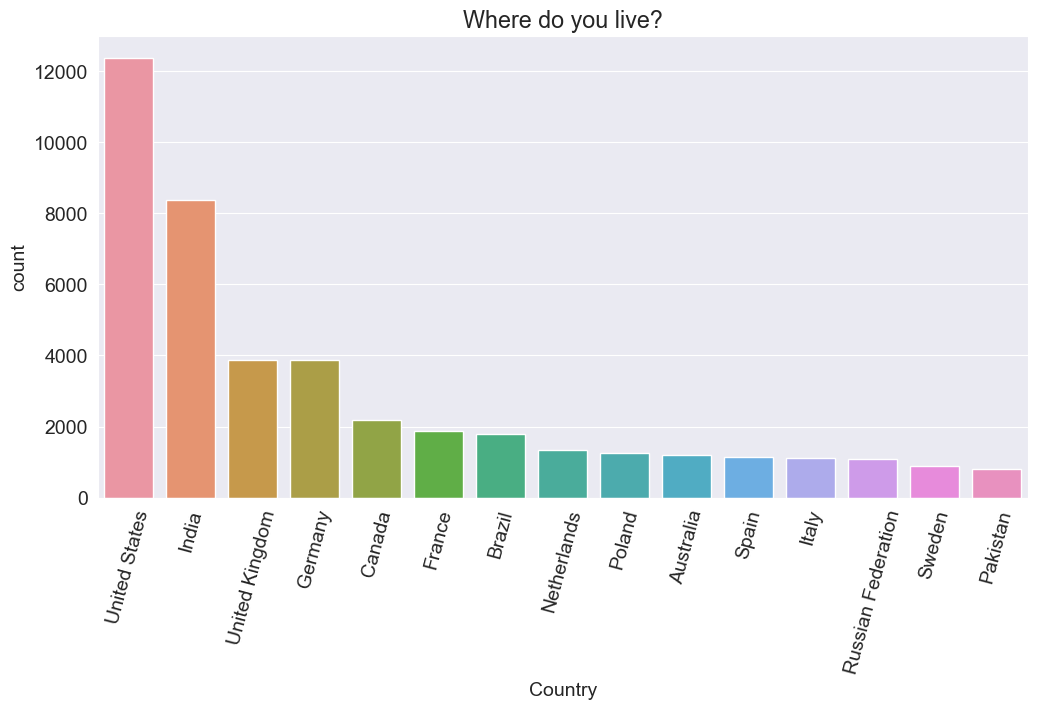

In [397]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

## Age

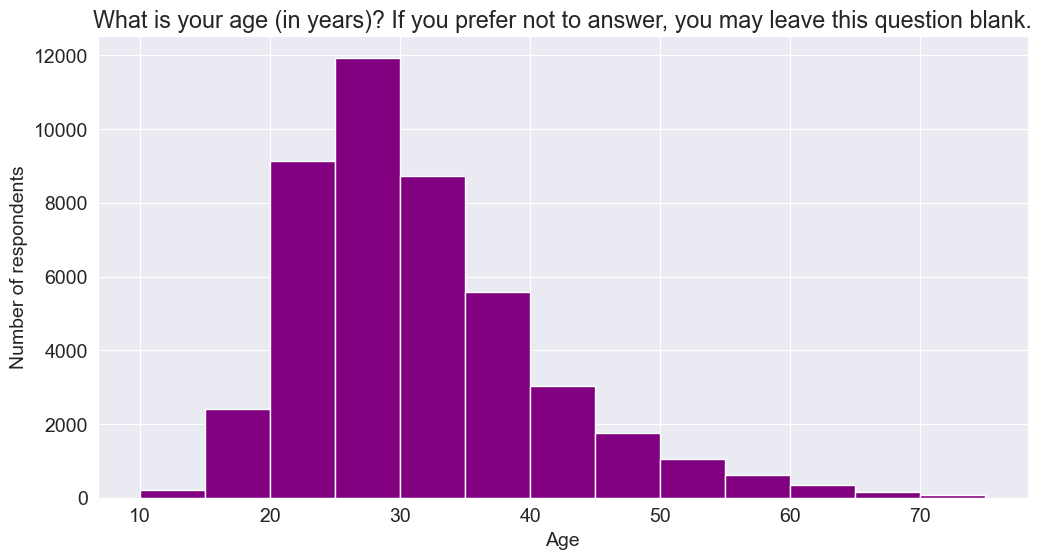

In [398]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

#### Adding new column "AgeGroup" into survey_df DataFrame

In [399]:
bins = [0, 10, 18, 30, 45, 60, float('inf')]
labels = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']

survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=bins, labels=labels)

# Now, 'AgeGroup' column is added to the DataFrame with appropriate values

In [400]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
17526,Argentina,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,9.0,8.0,HTML/CSS;JavaScript;PHP;SQL,...,NaN,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Fairly important,18-30 years
59512,Nigeria,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,20.0,4.0,NaN,Bash/Shell/PowerShell;C#;JavaScript;Python;SQL,...,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",35.0,Slightly satisfied,Remote work options;Office environment or comp...,Often: 1-2 days per week or more,Fairly important,18-30 years
15020,India,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,20.0,3.0,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,...,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",55.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important,18-30 years
20759,Australia,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,20.0,12.0,JavaScript;Python,...,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, full-stack;Product manager",40.0,Very satisfied,Industry that I’d be working in;Remote work op...,Occasionally: 1-2 days per quarter but less th...,Very important,NaN
63123,Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,6.0,14.0,2.0,NaN,...,NaN,NaN,Employed full-time,"Developer, back-end;Developer, front-end",NaN,Very satisfied,NaN,Often: 1-2 days per week or more,Fairly important,NaN
57156,Sudan,23.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",Yes,19.0,4.0,NaN,HTML/CSS;JavaScript;Python,...,Every few months,Meditate;Visit Stack Overflow,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,NaN,18-30 years
11066,Netherlands,36.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,10.0,20.0,10.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,...,Once a year,Call a coworker or friend,Employed full-time,"Developer, back-end;Developer, front-end",40.0,Slightly satisfied,Industry that I’d be working in;Office environ...,Never,Very important,30-45 years
60399,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Bash/Shell/PowerShell;HTML/CSS;Python,...,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47793,Greece,36.0,Man,Some college/university study without earning ...,Mathematics or statistics,Yes,16.0,12.0,7.0,C#;HTML/CSS;JavaScript;PHP;TypeScript;VBA,...,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",42.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Very important,30-45 years
1169,Pakistan,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,19.0,13.0,Bash/Shell/PowerShell;C#;C++;SQL;TypeScript,...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per q

#### Grouping Data by Age Group and Calculating Statistics:

In [401]:
grouped = survey_df.groupby('AgeGroup')
age_group_stats = grouped['Age'].mean()

In [402]:
age_group_stats

AgeGroup
Less than 10 years     10.000000
10-18 years            16.513877
18-30 years            25.221811
30-45 years            36.180254
45-60 years            51.170237
Older than 60 years    67.060665
Name: Age, dtype: float64

#### Filtering Data Based on Age Group:

In [403]:
age_30_to_45 = survey_df[survey_df['AgeGroup'] == '30-45 years']

In [404]:
age_30_to_45

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30-45 years
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,30-45 years
15,United Kingdom,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,37.0,23.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",50.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Fairly important,30-45 years
17,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,19.0,12.0,Bash/Shell/PowerShell;HTML/CSS;Perl,...,Once every few years,Play games;Visit Stack Overflow;Do other work ...,Employed full-time,"Developer, back-end",45.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Very important,30-45 years
19,Spain,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,22.0,17.0,Java;JavaScript;SQL,...,Once every few years,Meditate;Call a coworker or friend;Go for a wa...,Employed full-time,"Developer, desktop or enterprise applications",50.0,Neither satisfied nor dissatisfied,NaN,Often: 1-2 days per week or more,Very important,30-45 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64392,Bangladesh,36.0,NaN,NaN,NaN,Yes,35.0,NaN,12.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,Critically important,30-45 years
64411,Belgium,44.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15.0,NaN,NaN,NaN,...,NaN,Visit another developer community (please name):,NaN,NaN,NaN,NaN,NaN,NaN,Fairly important,30-45 years
64413,United States,32.0,Man,Some college/university study without earning ...,Mathematics or statistics,Yes,23.0,8.0,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,Watch help / tutorial videos;Visit another dev...,"Independent contractor, freelancer, or self-em...","Data or business analyst;Developer, back-end;S...",NaN,NaN,NaN,NaN,Very important,30-45 years
64427,Brazil,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,16.0,14.0,Python;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,30-45 years


#### Aggregating Data Based on Multiple Columns:

In [502]:
grouped = survey_df.groupby(['AgeGroup', 'Gender'])
age_group_gender_stats = grouped['WorkWeekHrs'].mean()

In [506]:
age_group_gender = pd.DataFrame(age_group_gender_stats)
age_group_gender

WorkWeekHrs
AgeGroup            Gender                                                        
Less than 10 years  Man                                                  45.000000
                    Non-binary, genderqueer, or gender non-conforming          NaN
                    Woman                                                      NaN
10-18 years         Man                                                  31.572000
                    Non-binary, genderqueer, or gender non-conforming    69.333333
                    Woman                                                24.000000
18-30 years         Man                                                  39.453199
                    Non-binary, genderqueer, or gender non-conforming    38.017007
                    Woman                                                38.782361
30-45 years         Man                                                  40.735530
                    Non-binary, genderqueer, or gender non-conforming    38.654930
                    Woman                                                39.560920
45-60 years         Man                                                  41.915150
                    Non-binary, genderqueer, or gender non-conforming    41.250000
                    Woman                                                39.238095
Older than 60 years Man                                                  41.656028
                    Non-binary, genderqueer, or gender non-conforming    27.000000
                    Woman                                                39.285714

#### Counting the Number of Observations in Each Age Group:

In [407]:
age_group_counts = survey_df['AgeGroup'].value_counts().drop("Less than 10 years")
age_group_counts

AgeGroup
18-30 years            24272
30-45 years            15431
45-60 years             3034
10-18 years             1816
Older than 60 years      511
Name: count, dtype: int64

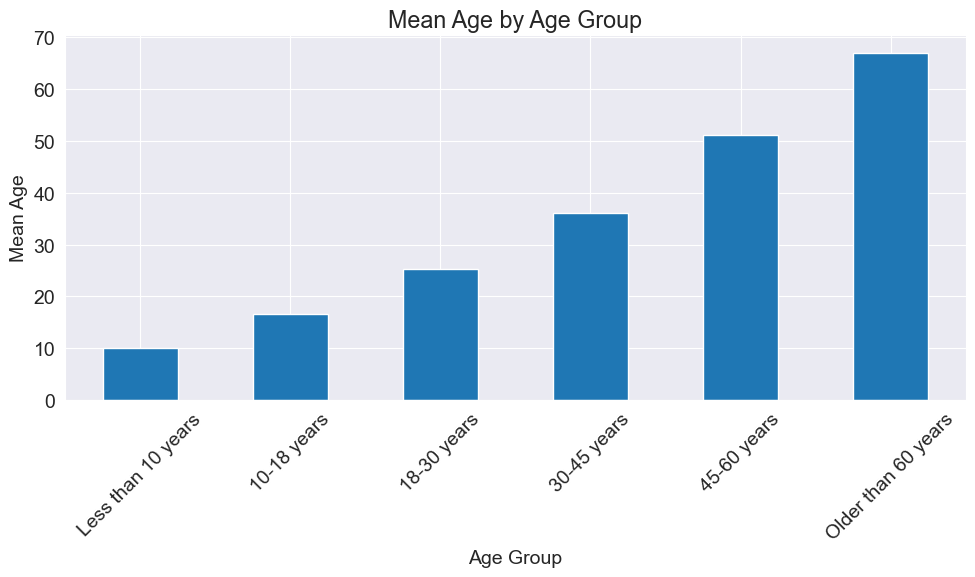

In [408]:
# Age group statistics

plt.figure(figsize=(10, 6))
age_group_stats.plot(kind='bar')
plt.title('Mean Age by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

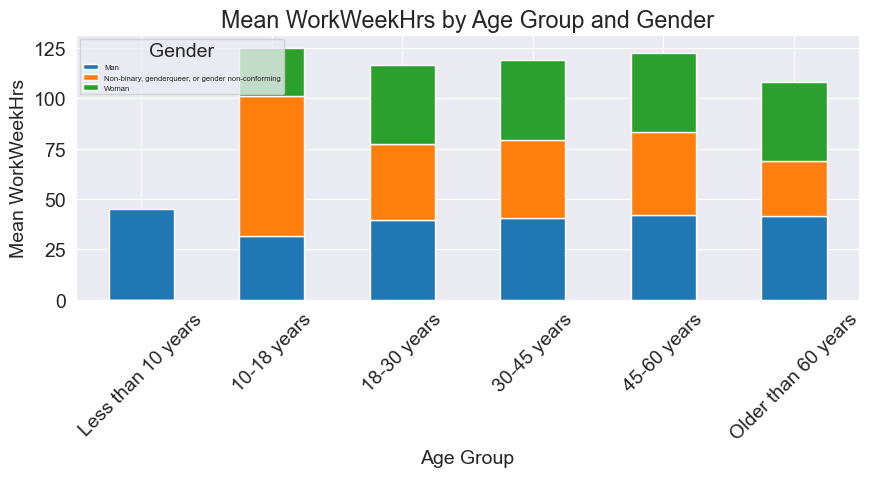

In [409]:
# Age group and gender statistics

plt.figure(figsize=(12, 6))
age_group_gender_stats.unstack().plot(kind='bar', stacked=True)
plt.title('Mean WorkWeekHrs by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Mean WorkWeekHrs')
plt.xticks(rotation=45)
plt.legend(title='Gender',fontsize="5.5", loc="upper left")
plt.tight_layout()
plt.show()

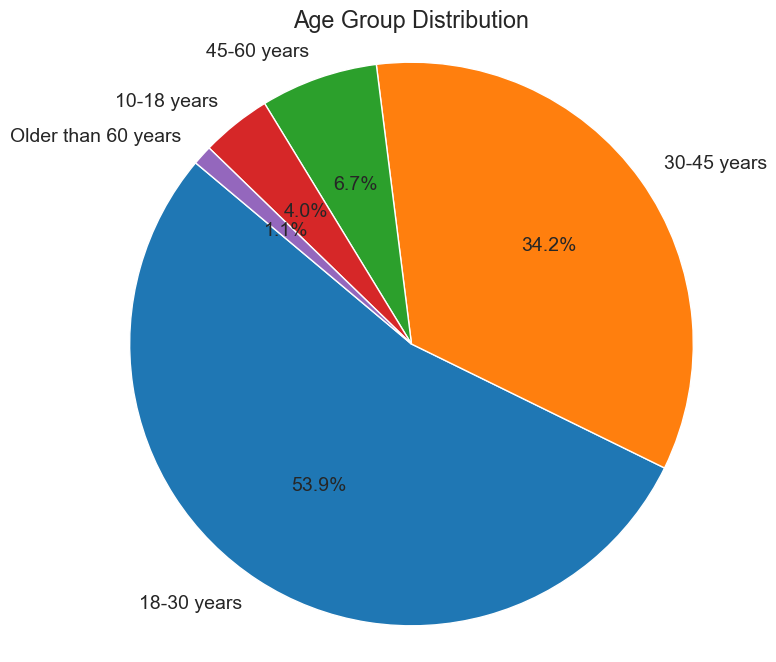

In [410]:
# Age group counts as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

## Gender

In [411]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [412]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

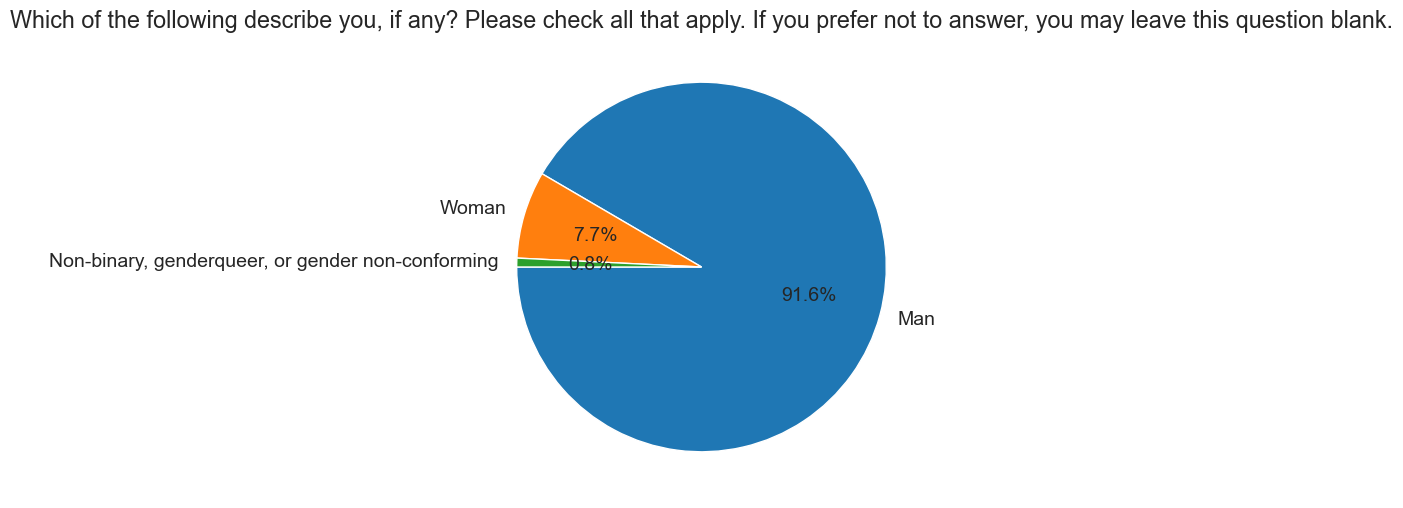

In [413]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

#### Compare Education Levels Across Genders:

In [414]:
education_gender_grouped = survey_df.groupby(['Gender', 'EdLevel']).size().unstack()
education_gender_percentages = education_gender_grouped.div(education_gender_grouped.sum(axis=1), axis=0) * 100

In [415]:
education_gender_percentages.round(2)

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I never completed any formal education,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree
Gender,,,,,,,,,
Man,3.31,45.65,0.66,22.65,2.89,1.70,1.37,8.69,13.09
"Non-binary, genderqueer, or gender non-conforming",3.77,37.47,2.16,18.60,3.50,1.62,0.81,13.48,18.60
Woman,2.71,51.54,0.43,25.29,3.99,0.56,1.07,5.63,8.79


#### Analyze Survey Responses and Employement:

In [416]:
# Group by 'Gender' and analyze survey responses/employement
gender_survey_responses = survey_df.groupby('Gender')['Employment'].value_counts().unstack()

In [417]:
gender_survey_responses

Employment,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Student
Gender,,,,,,,
Man,32567,1473,4217,205,1616,161,5499
"Non-binary, genderqueer, or gender non-conforming",241,23,23,6,18,1,70
Woman,2740,175,221,18,184,16,454


(array([0, 1, 2]),
 [Text(0, 0, 'Man'),
  Text(1, 0, 'Non-binary, genderqueer, or gender non-conforming'),
  Text(2, 0, 'Woman')])

<Figure size 1200x600 with 0 Axes>

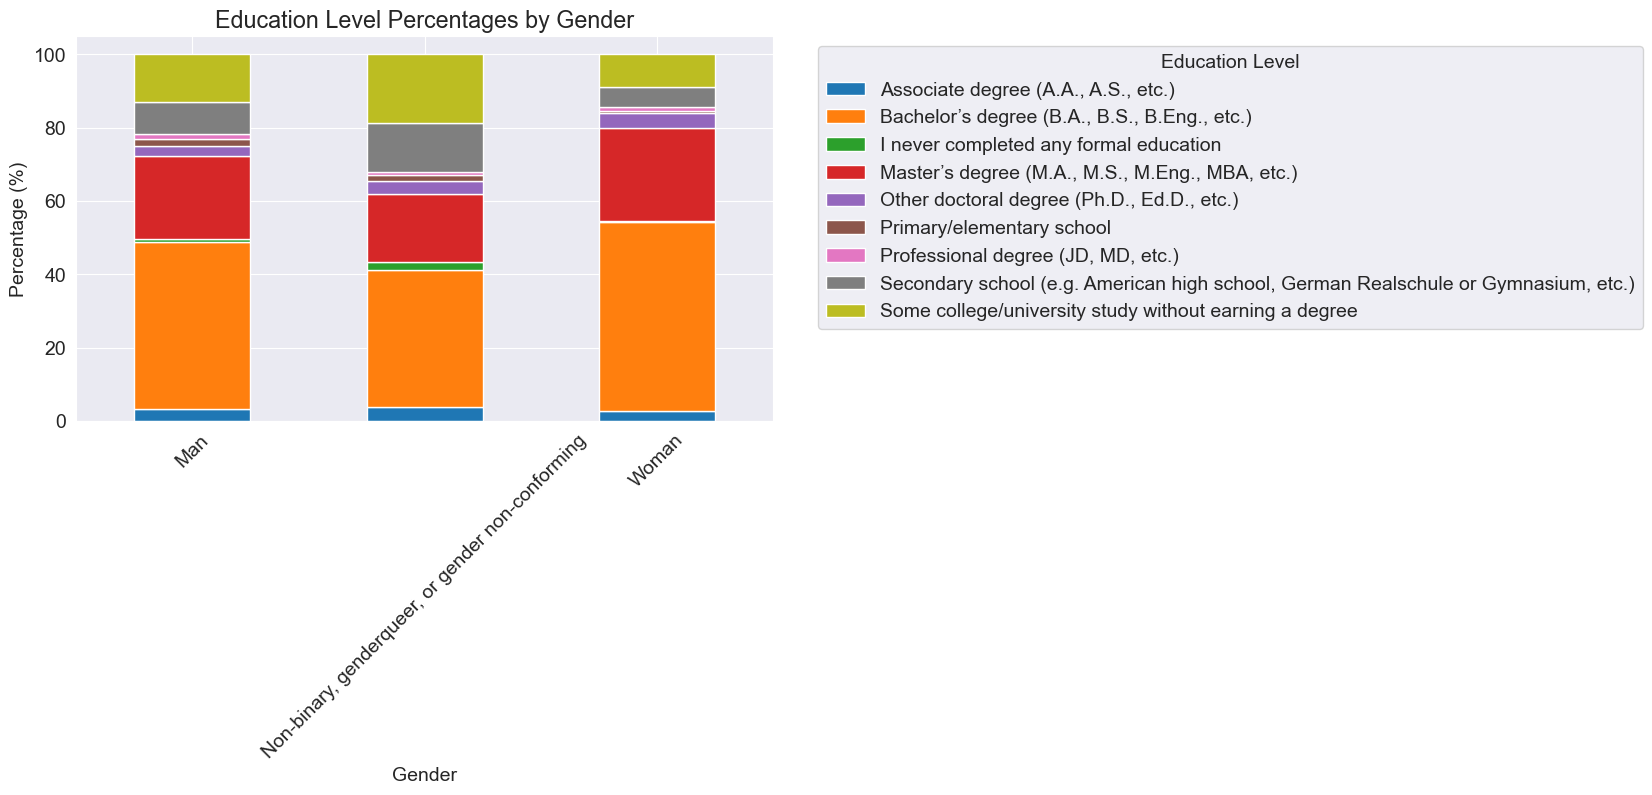

In [507]:
# Plotting education level percentages by gender

plt.figure(figsize=(12, 6))
education_gender_percentages.plot(kind='bar', stacked=True)
plt.title('Education Level Percentages by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

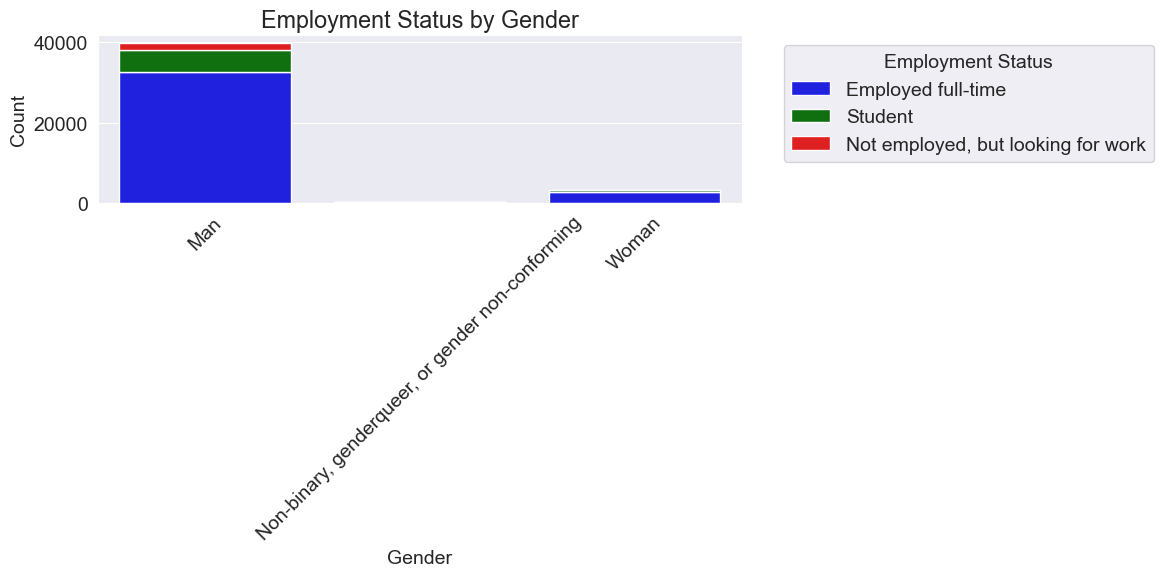

In [419]:
# Plotting employment status by gender

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_survey_responses.index, y="Employed full-time", data=gender_survey_responses, color="b", label="Employed full-time")
sns.barplot(x=gender_survey_responses.index, y="Student", data=gender_survey_responses, bottom=gender_survey_responses["Employed full-time"], color="g", label="Student")
sns.barplot(x=gender_survey_responses.index, y="Not employed, but looking for work", data=gender_survey_responses, bottom=gender_survey_responses["Employed full-time"] + gender_survey_responses["Student"], color="r", label="Not employed, but looking for work")
plt.title('Employment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Education Level

In [420]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [421]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

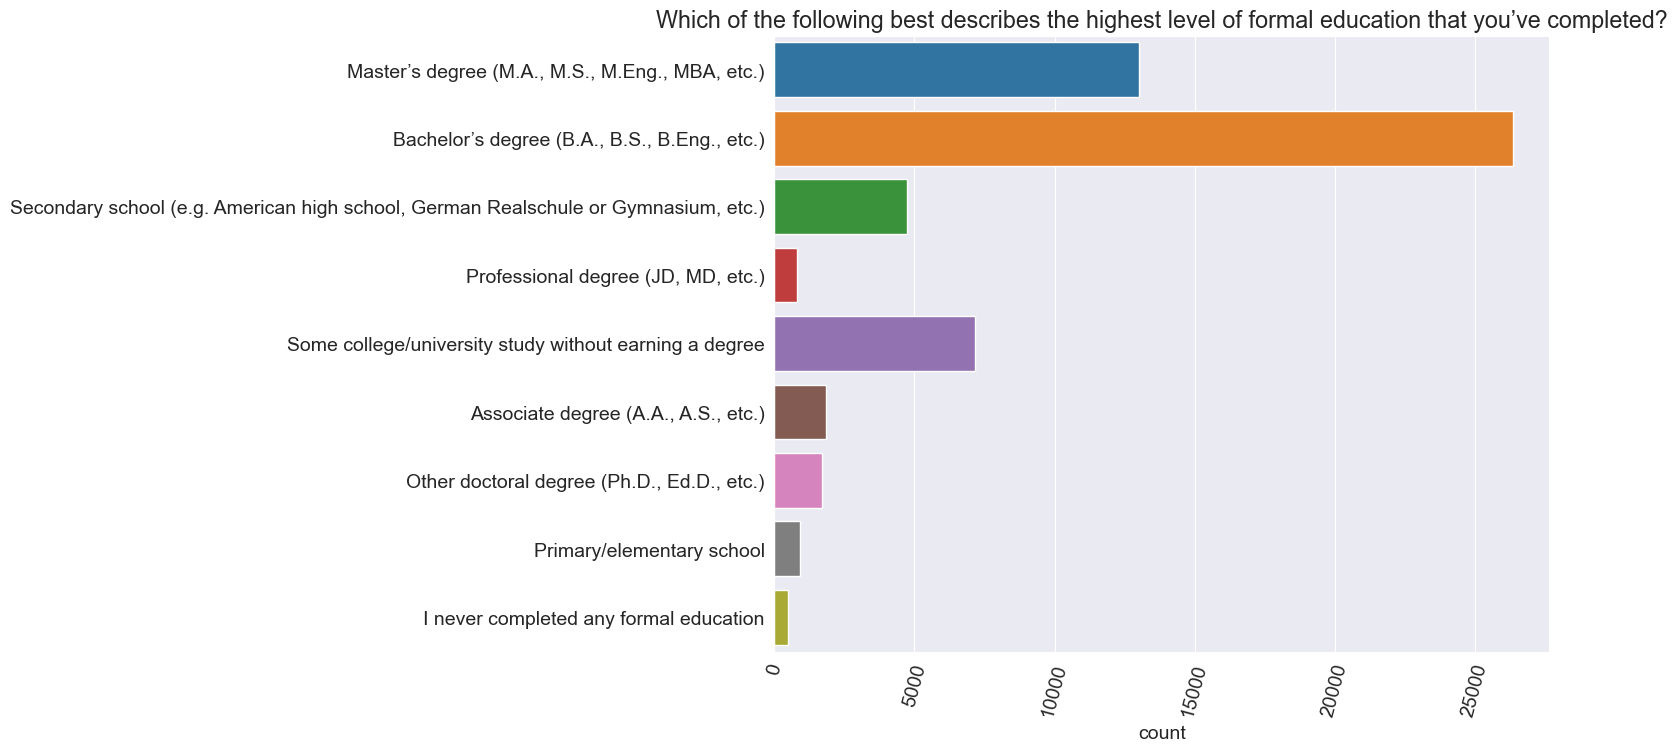

In [422]:
plt.figure(figsize=(10, 8))

# Create the countplot
sns.countplot(y=survey_df.EdLevel)

# Customize the plot
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None)

# Show the plot
plt.show()

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.The graph currently shows the number of respondents for each option



Therefore we can  modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women.

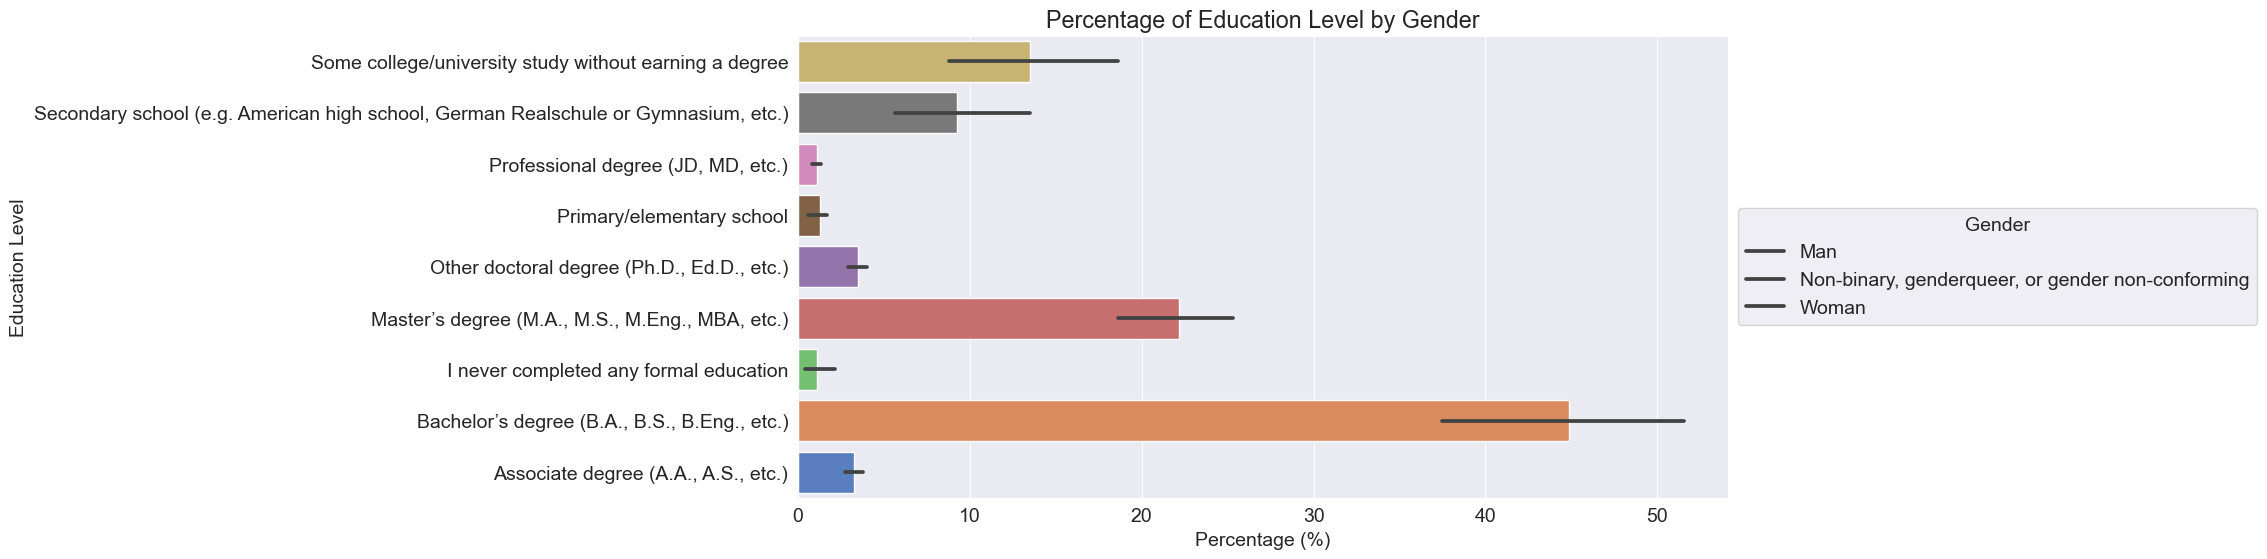

In [423]:
# Calculate the percentage of each degree for each gender
degree_gender_grouped = survey_df.groupby(['Gender', 'EdLevel']).size().unstack()
degree_gender_percentages = degree_gender_grouped.div(degree_gender_grouped.sum(axis=1), axis=0) * 100

# Plot the percentage of each degree for each gender
plt.figure(figsize=(12, 6))
sns.barplot(data=degree_gender_percentages, orient='h', palette='muted')
plt.xlabel('Percentage (%)')
plt.ylabel('Education Level')
plt.title('Percentage of Education Level by Gender')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1, 0.5), labels=degree_gender_percentages.index)
plt.xticks(rotation=0)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest degree at the top
plt.show()

In [424]:
schema.UndergradMajor

'What was your primary field of study?'

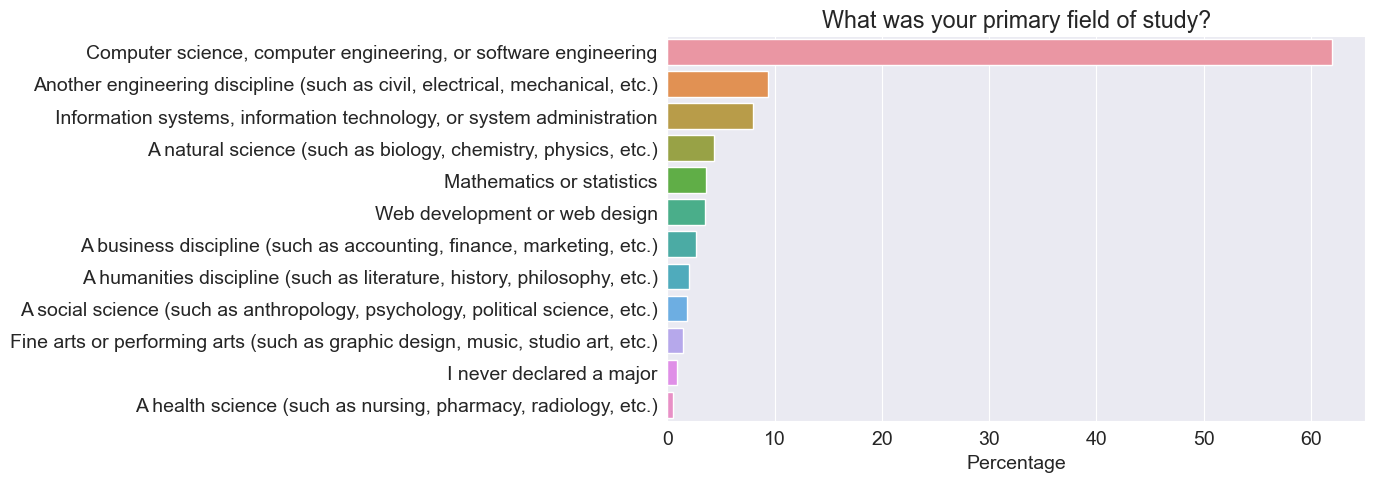

In [425]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [426]:
# Separate respondents with some college degree and without
some_college_degree = survey_df[survey_df['EdLevel'] == "Some college/university study without earning a degree"]
no_college_degree = survey_df[survey_df['EdLevel'] != "Some college/university study without earning a degree"]

In [427]:
some_college_degree_counts = some_college_degree['NEWEdImpt'].value_counts(normalize=True)
no_college_degree_counts = no_college_degree['NEWEdImpt'].value_counts(normalize=True)

In [428]:
print("Some College Degree:")
print(some_college_degree_counts)

print("\nNo College Degree:")
print(no_college_degree_counts)

Some College Degree:
NEWEdImpt
Not at all important/not necessary    0.375844
Somewhat important                    0.324941
Fairly important                      0.177157
Very important                        0.098340
Critically important                  0.023718
Name: proportion, dtype: float64

No College Degree:
NEWEdImpt
Fairly important                      0.272629
Very important                        0.263876
Somewhat important                    0.223346
Not at all important/not necessary    0.132524
Critically important                  0.107625
Name: proportion, dtype: float64


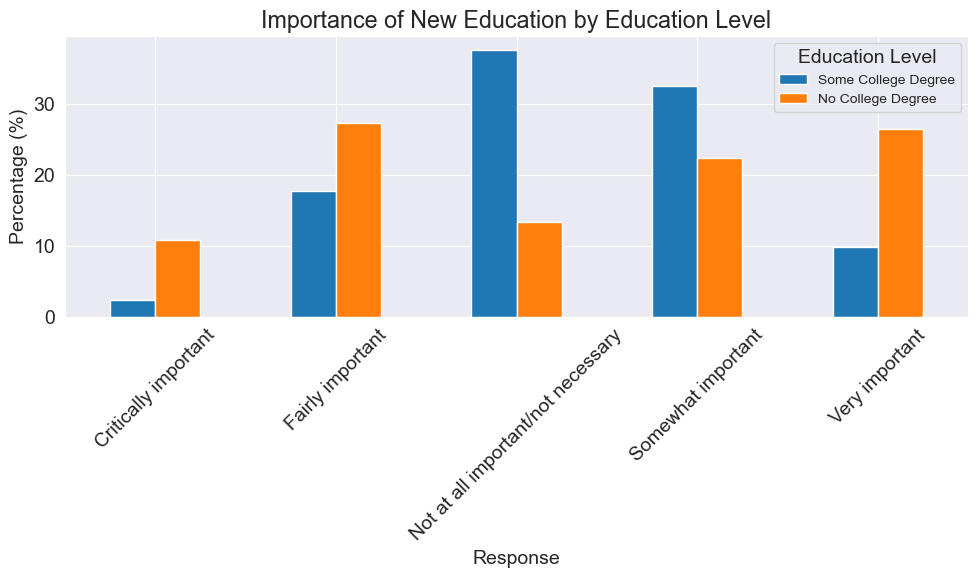

In [429]:
# Create a DataFrame to compare the proportions
comparison_df = pd.DataFrame({
    'Some College Degree': some_college_degree_counts * 100,  
    'No College Degree': no_college_degree_counts * 100
})

# Plot the comparison
ax = comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Importance of New Education by Education Level')
plt.xlabel('Response')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Education Level', loc='upper right',fontsize="10")
plt.tight_layout()
plt.show()

### Employment

In [430]:
schema.Employment

'Which of the following best describes your current employment status?'

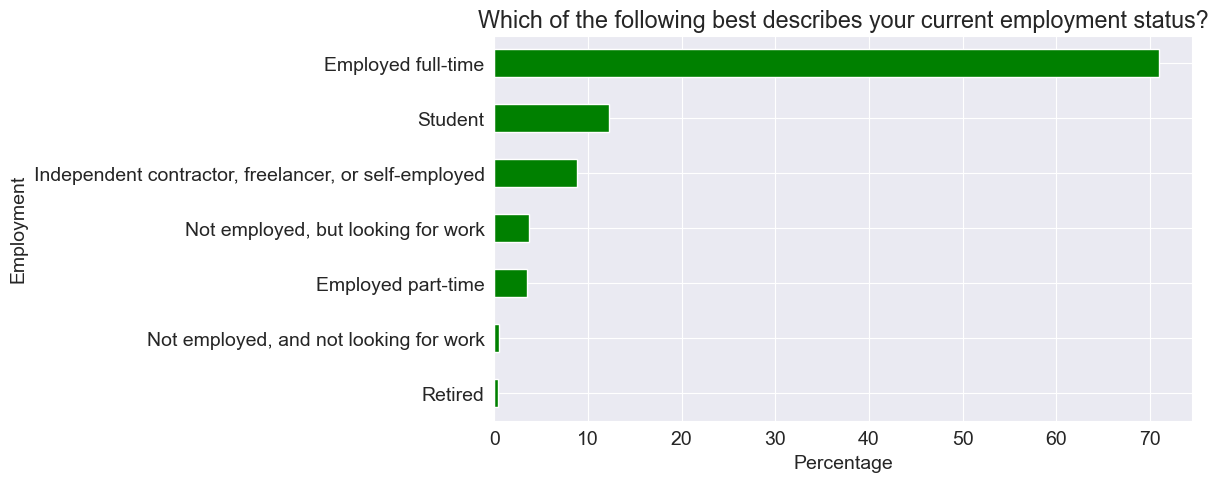

In [431]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

Q. Add a new column EmploymentType containing the values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired). For each of the graphs that follow, show a comparison between Enthusiast and Professional.

In [508]:
# Define a function to categorize employment types
def categorize_employment(employment_status):
    if employment_status in ['Student', 'Not employed, but looking for work']:
        return 'Enthusiast'
    elif employment_status in ['Employed full-time', 'Employed part-time', 'Freelance']:
        return 'Professional'
    else:
        return 'Other'

# Apply the categorize_employment function to create the 'EmploymentType' column
survey_df['EmploymentType'] = survey_df['Employment'].apply(categorize_employment)

# Check the first few rows of the updated DataFrame
print(survey_df[['Employment', 'EmploymentType']].head())

                                          Employment EmploymentType
0  Independent contractor, freelancer, or self-em...          Other
1                                 Employed full-time   Professional
2                                                NaN          Other
3                                                NaN          Other
4                                 Employed full-time   Professional


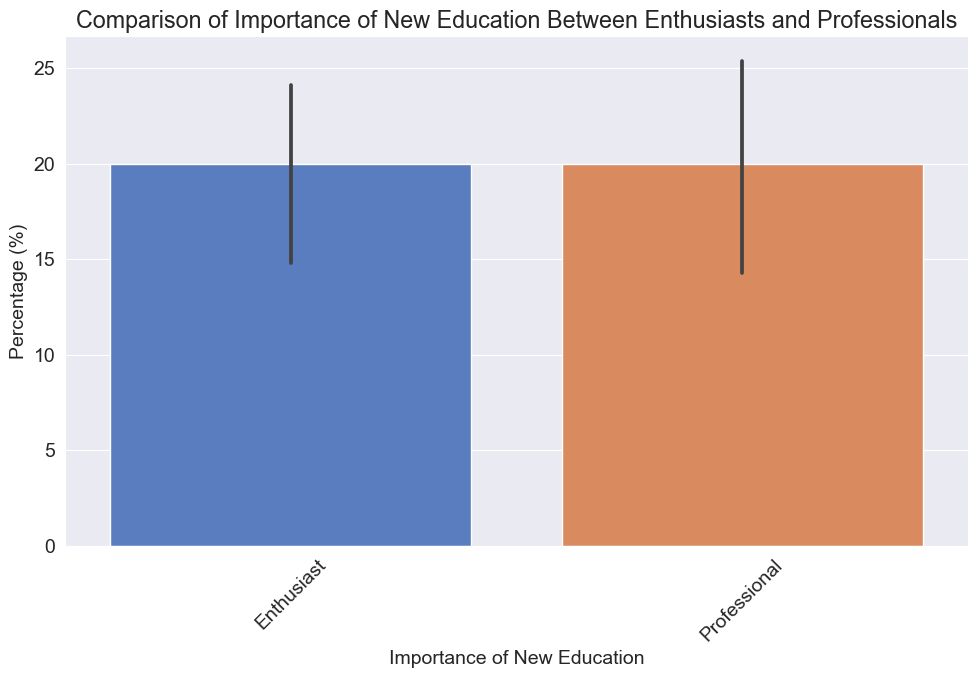

In [512]:
# Filter the DataFrame for Enthusiasts and Professionals
enthusiast_df = survey_df[survey_df['EmploymentType'] == 'Enthusiast']
professional_df = survey_df[survey_df['EmploymentType'] == 'Professional']

# Calculate the percentage of responses for 'NEWEdImpt' for Enthusiasts and Professionals
enthusiast_impt_counts = enthusiast_df['NEWEdImpt'].value_counts(normalize=True).sort_index() * 100
professional_impt_counts = professional_df['NEWEdImpt'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Enthusiast': enthusiast_impt_counts,
    'Professional': professional_impt_counts
})

# Plot the comparison
plt.figure(figsize=(10, 7))
sns.barplot(data=comparison_df, palette='muted')
plt.title('Comparison of Importance of New Education Between Enthusiasts and Professionals')
plt.xlabel('Importance of New Education')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [513]:
survey_df.head(15)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup,EmploymentType
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN,Other
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN,Professional
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18-30 years,Other
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30-45 years,Professional
5,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,...,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important,NaN,Professional
6,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,...,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important,NaN,Professional
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,30-45 years,Professional
8,Tunisia,30.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",No,20.0,6.0,4.0,HTML/CSS;JavaScript;PHP,...,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important,18-30 years,Other
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,...,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important,18-30 years,Professional


In [438]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [439]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

####

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [440]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into a list of options
        for option in value.split(';'):
            # Add the option as a column to the result DataFrame
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [441]:
dev_type_df = split_multicolumn(survey_df['DevType'])

In [442]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

We can now use the column-wise totals to identify the most common roles.

In [443]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name. 

In [444]:
# Step 1: Define Data Science-Related Roles

data_science_roles = ["Data Scientist", "Machine Learning Engineer", "Data Analyst"]

In [445]:
# Step 2: Filter Respondents

data_science_df = survey_df[survey_df['DevType'].str.contains('|'.join(data_science_roles), na=False, case=False)]

In [446]:
# Step 3: Calculate Percentage of Data Science Respondents

percentage_data_scientists = (len(data_science_df) / len(survey_df)) * 100
print(f"Percentage of respondents in data science-related roles: {percentage_data_scientists:.2f}%")

Percentage of respondents in data science-related roles: 6.13%


In [447]:
# Step 4: Identify Positions with Highest Percentage of Women

women_percentage_by_position = data_science_df[data_science_df['Gender'] == 'Woman']['DevType'].value_counts(normalize=True) * 100
highest_percentage_women = women_percentage_by_position.head(1)
print("\nPositions with the highest percentage of women:")
print(highest_percentage_women)


Positions with the highest percentage of women:
DevType
Data scientist or machine learning specialist    17.320261
Name: proportion, dtype: float64


### Example 1: Exploring Categorical Columns

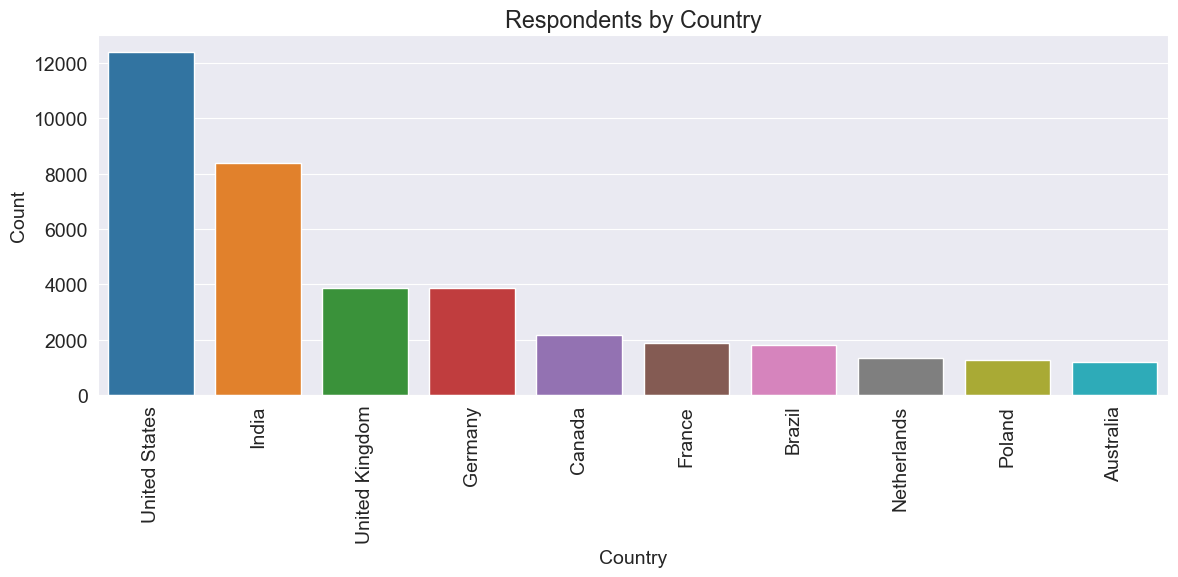

In [452]:
# Bar plot for a categorical column
plt.figure(figsize=(12, 6))
sns.countplot(data=survey_df, x='Country', order=survey_df['Country'].value_counts().head(10).index)
plt.title('Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21616\1559746665.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


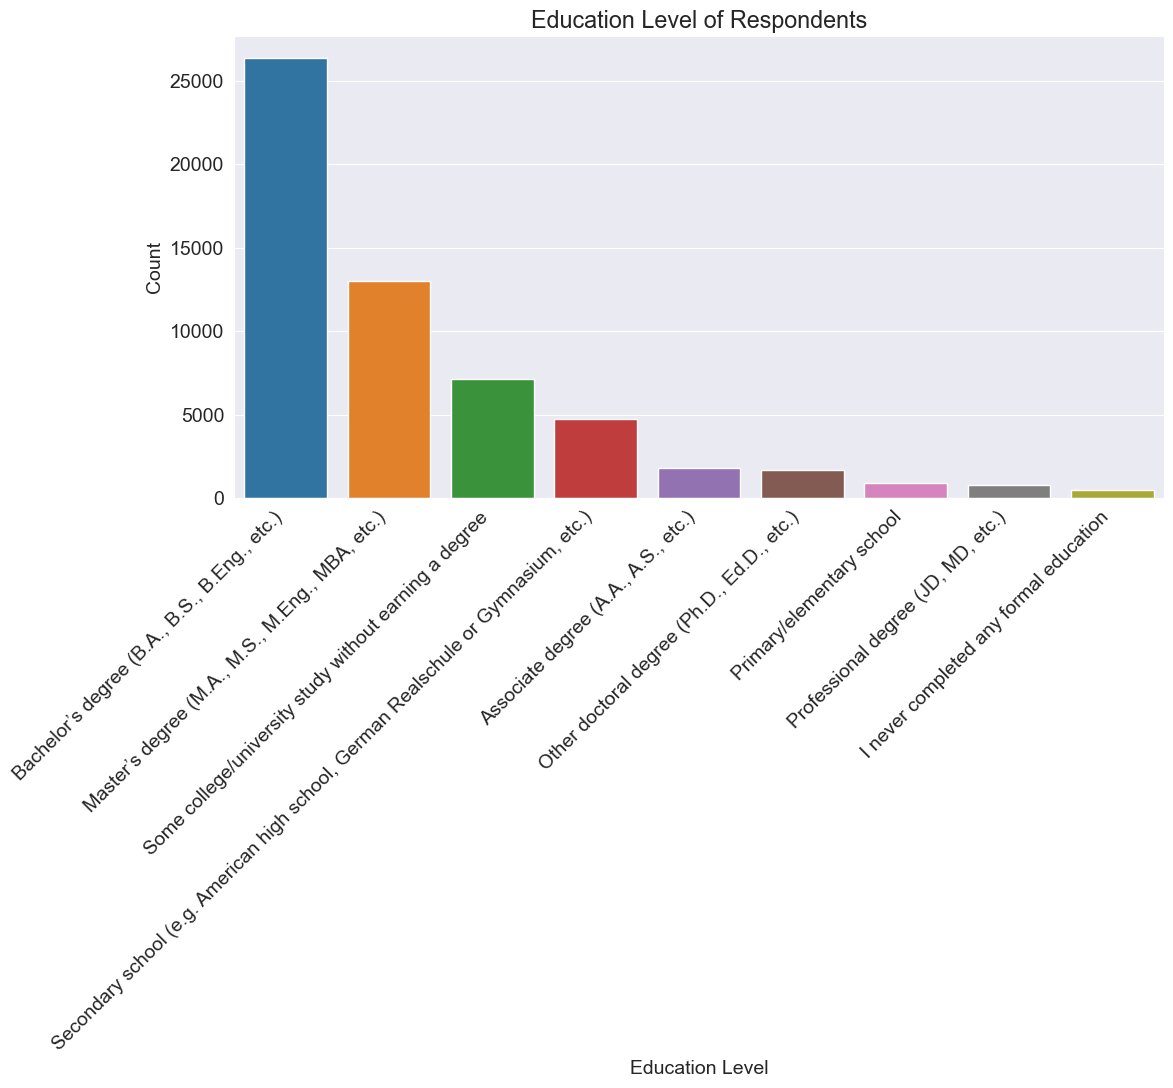

In [456]:
# Bar plot for another categorical column
plt.figure(figsize=(12, 6))
sns.countplot(data=survey_df, x='EdLevel', order=survey_df['EdLevel'].value_counts().head(10).index)
plt.title('Education Level of Respondents')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Example 2: Exploring Text Columns

In [450]:
!pip install wordcloud --quiet

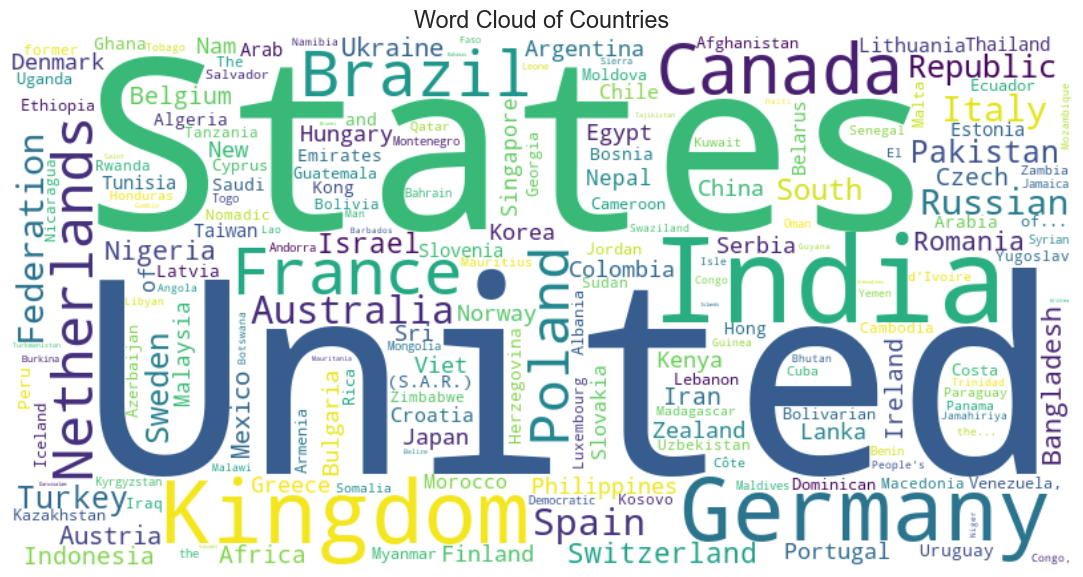

In [457]:
from wordcloud import WordCloud

# Analyze word frequencies in a text column (e.g., 'Country')
word_freq = survey_df['Country'].str.split().explode().value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Countries')
plt.axis('off')
plt.tight_layout()
plt.show()


## Answering Questions

#### Q: What are the most popular programming languages in 2020?

In [458]:
# we can use the LanguageWorkedWith column. Similar to DevType, respondents were allowed to choose multiple options 

survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [459]:
# First, we'll split this column into a data frame containing a column of each language listed in the options.

languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [460]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [461]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

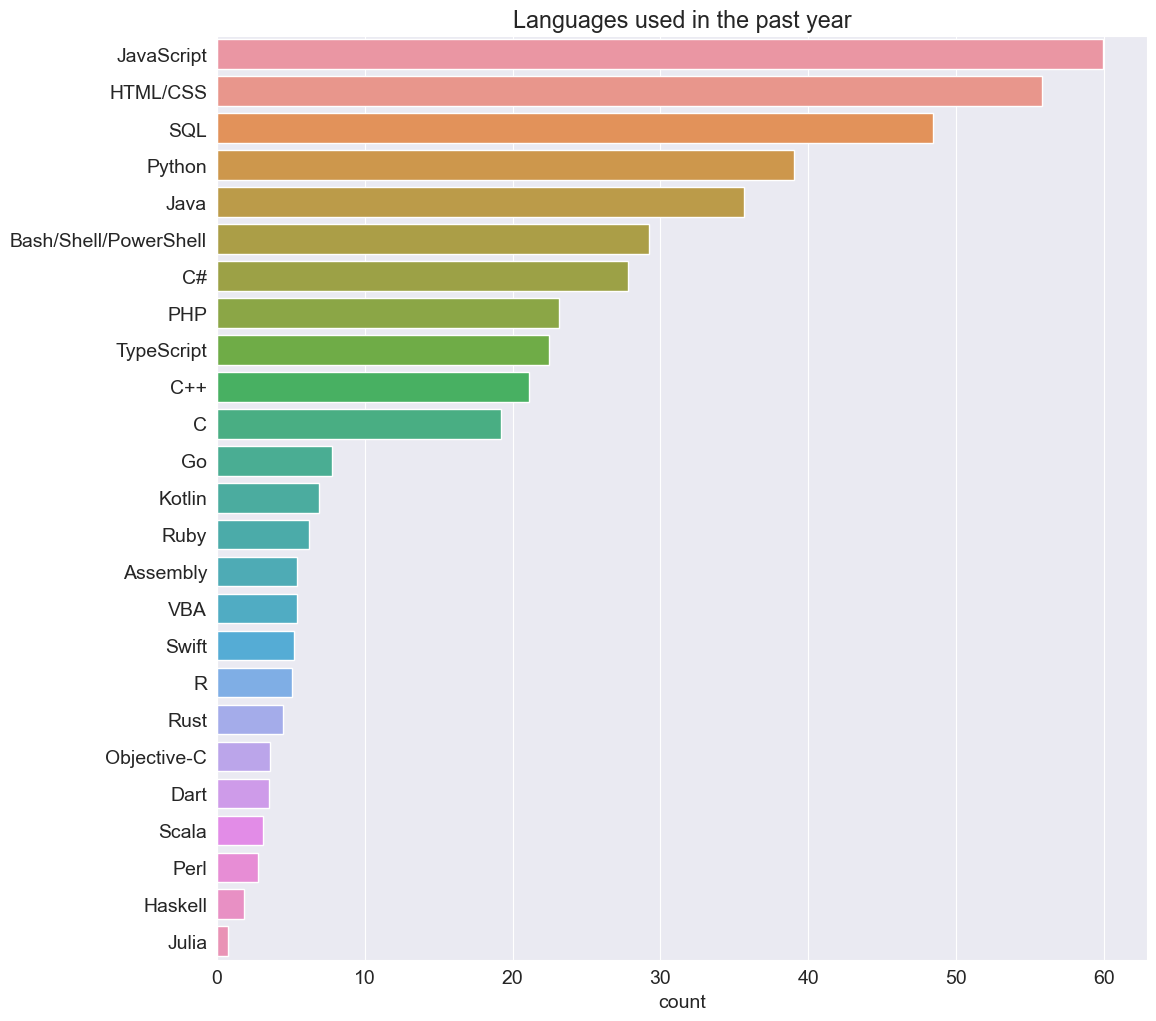

In [462]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly

#### What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?

In [514]:
# Filter respondents who are students
students_df = survey_df[survey_df['Employment'] == 'Student']

# Calculate the most common languages used by students
students_languages_percentages = languages_worked_df.loc[students_df.index].mean().sort_values(ascending=False) * 100

# Filter respondents who are professional developers
pro_devs_df = survey_df[survey_df['EmploymentType'] == 'Professional']

# Calculate the most common languages used by professional developers
pro_devs_languages_percentages = languages_worked_df.loc[pro_devs_df.index].mean().sort_values(ascending=False) * 100

# Compare the two lists
common_languages_students = students_languages_percentages.head(10)
common_languages_pro_devs = pro_devs_languages_percentages.head(10)

print("Most Common Languages Used by Students:")
print(common_languages_students)

print("\nMost Common Languages Used by Professional Developers:")
print(common_languages_pro_devs)


Most Common Languages Used by Students:
HTML/CSS                 59.749160
Python                   56.490820
JavaScript               52.275666
Java                     49.107836
C++                      41.802431
C                        40.884407
SQL                      39.216447
Bash/Shell/PowerShell    25.536592
C#                       24.605637
PHP                      23.674683
dtype: float64

Most Common Languages Used by Professional Developers:
JavaScript               61.389372
HTML/CSS                 54.809364
SQL                      50.445312
Python                   36.996904
Java                     34.568896
Bash/Shell/PowerShell    30.819797
C#                       29.201832
TypeScript               24.958650
PHP                      22.085330
C++                      17.899402
dtype: float64


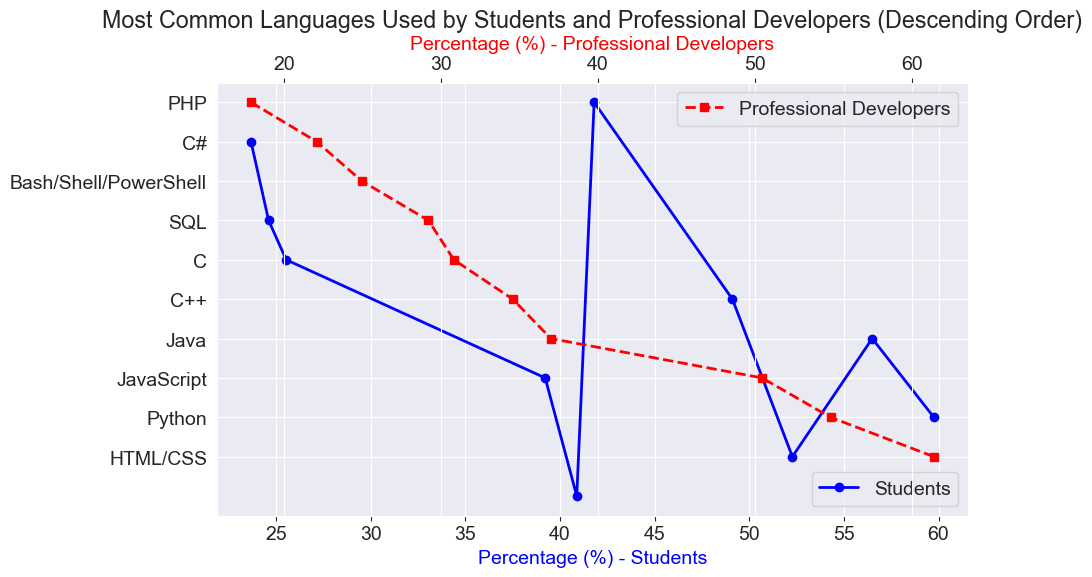

In [515]:
# Data for common languages used by students and professional developers
languages_students = common_languages_students.index[::-1]  # Reverse the order to descending
percentages_students = common_languages_students.values[::-1]  # Reverse the order to descending
languages_pro_devs = common_languages_pro_devs.index[::-1]  # Reverse the order to descending
percentages_pro_devs = common_languages_pro_devs.values[::-1]  # Reverse the order to descending

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for students on the first y-axis (left)
ax.plot(percentages_students, languages_students, color='b', marker='o', label='Students', linestyle='-', linewidth=2)

# Create a secondary y-axis (right)
ax2 = ax.twiny()

# Plot data for professional developers on the second y-axis (right)
ax2.plot(percentages_pro_devs, languages_pro_devs, color='r', marker='s', label='Professional Developers', linestyle='--', linewidth=2)

# Set labels and title
ax.set_xlabel('Percentage (%) - Students', color='b')
ax2.set_xlabel('Percentage (%) - Professional Developers', color='r')
ax.set_yticks(np.arange(len(languages_students)))
ax.set_yticklabels(languages_students)
ax.set_title('Most Common Languages Used by Students and Professional Developers (Descending Order)')

# Invert the y-axis to display the most common languages at the top
ax.invert_yaxis()

# Add legends for both lines
ax.legend(loc='lower right')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


#### What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?

In [466]:
# Filter respondents who are not "Developer, front-end"
non_frontend_devs_df = survey_df[~survey_df['DevType'].str.contains('Developer, front-end', na=False)]

# Calculate the most common languages used by non "Developer, front-end" respondents
non_frontend_devs_languages_percentages = languages_worked_df.loc[non_frontend_devs_df.index].mean().sort_values(ascending=False) * 100

# Get the top languages
common_languages_non_frontend_devs = non_frontend_devs_languages_percentages.head(10)
print("Most Common Languages Among Non 'Developer, front-end' Respondents:")
print(common_languages_non_frontend_devs)


Most Common Languages Among Non 'Developer, front-end' Respondents:
JavaScript               50.433107
HTML/CSS                 46.983412
SQL                      45.337607
Python                   42.039499
Java                     36.363636
Bash/Shell/PowerShell    29.219542
C#                       25.577115
C++                      23.121400
C                        21.051150
PHP                      19.420503
dtype: float64


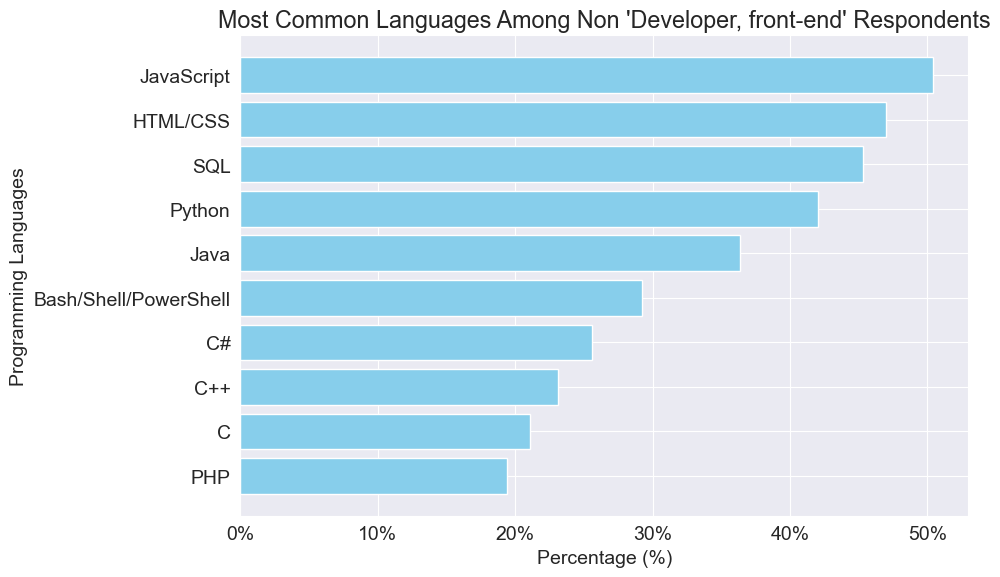

In [467]:
# Data for common languages used by non "Developer, front-end" respondents
languages_non_frontend_devs = common_languages_non_frontend_devs.index[::-1]  # Reverse the order to descending
percentages_non_frontend_devs = common_languages_non_frontend_devs.values[::-1]  # Reverse the order to descending

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(languages_non_frontend_devs, percentages_non_frontend_devs, color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Programming Languages')
plt.title("Most Common Languages Among Non 'Developer, front-end' Respondents")
plt.gca().xaxis.set_major_formatter('{:.0f}%'.format)

# Display the plot
plt.tight_layout()
plt.show()

#### What are the most common languages among respondents who work in fields related to data science?

In [468]:
# Filter respondents in fields related to data science
data_sci_related_df = survey_df[survey_df['DevType'].str.contains('Data scientist', na=False)]

# Calculate the most common languages used by data science-related respondents
data_sci_languages_percentages = languages_worked_df.loc[data_sci_related_df.index].mean().sort_values(ascending=False) * 100

# Get the top languages
common_languages_data_sci_related = data_sci_languages_percentages.head(10)
print("Most Common Languages Among Data Science-Related Respondents:")
print(common_languages_data_sci_related)

Most Common Languages Among Data Science-Related Respondents:
Python                   78.420919
SQL                      58.365067
JavaScript               48.235593
HTML/CSS                 48.134044
Bash/Shell/PowerShell    39.451637
Java                     34.932724
C++                      29.576035
R                        27.621224
C                        24.904798
C#                       21.122112
dtype: float64


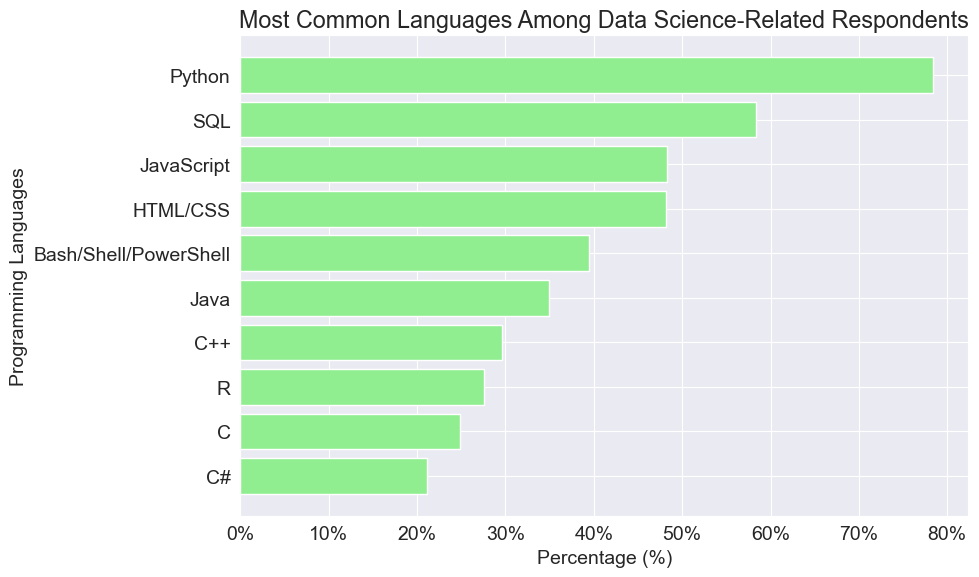

In [469]:
# Data for common languages used by data science-related respondents
languages_data_sci_related = common_languages_data_sci_related.index[::-1]  # Reverse the order to descending
percentages_data_sci_related = common_languages_data_sci_related.values[::-1]  # Reverse the order to descending

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(languages_data_sci_related, percentages_data_sci_related, color='lightgreen')
plt.xlabel('Percentage (%)')
plt.ylabel('Programming Languages')
plt.title("Most Common Languages Among Data Science-Related Respondents")
plt.gca().xaxis.set_major_formatter('{:.0f}%'.format)

# Display the plot
plt.tight_layout()
plt.show()

#### What are the most common languages used by developers older than 35 years of age?

In [470]:
# Filter respondents older than 35 years of age
older_devs_df = survey_df[survey_df['Age'] > 35]

# Calculate the most common languages used by older developers
older_devs_languages_percentages = languages_worked_df.loc[older_devs_df.index].mean().sort_values(ascending=False) * 100

# Get the top languages
common_languages_older_devs = older_devs_languages_percentages.head(10)
print("Most Common Languages Used by Developers Older Than 35:")
print(common_languages_older_devs)

Most Common Languages Used by Developers Older Than 35:
JavaScript               64.874070
SQL                      59.191539
HTML/CSS                 58.510352
Bash/Shell/PowerShell    40.198978
Python                   37.716232
C#                       35.170745
Java                     32.356368
PHP                      22.757014
TypeScript               22.559828
C++                      18.929820
dtype: float64


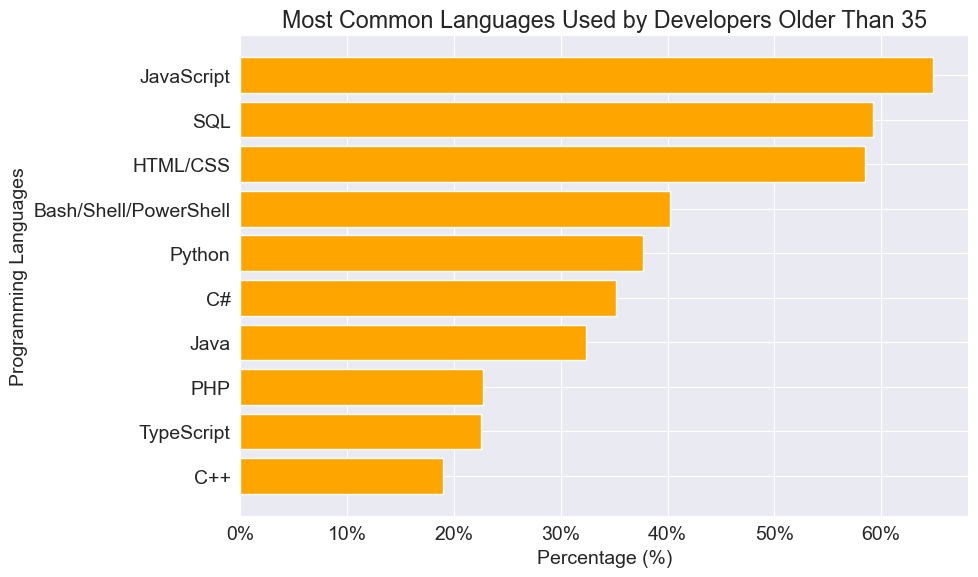

In [471]:
# Data for common languages used by older developers
languages_older_devs = common_languages_older_devs.index[::-1]  # Reverse the order to descending
percentages_older_devs = common_languages_older_devs.values[::-1]  # Reverse the order to descending

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(languages_older_devs, percentages_older_devs, color='orange')
plt.xlabel('Percentage (%)')
plt.ylabel('Programming Languages')
plt.title("Most Common Languages Used by Developers Older Than 35")
plt.gca().xaxis.set_major_formatter('{:.0f}%'.format)

# Display the plot
plt.tight_layout()
plt.show()

#### What are the most common languages used by developers in your home country?

In [472]:
# Filter respondents in your home country
your_country_devs_df = survey_df[survey_df['Country'] == 'India']

# Calculate the most common languages used by developers in your home country
your_country_devs_languages_percentages = languages_worked_df.loc[your_country_devs_df.index].mean().sort_values(ascending=False) * 100

# Get the top languages
common_languages_your_country = your_country_devs_languages_percentages.head(10)
print("Most Common Languages Used by Developers in India:")
print(common_languages_your_country)


Most Common Languages Used by Developers in India:
JavaScript    52.965088
HTML/CSS      51.267336
SQL           40.483022
Java          38.677666
Python        31.779053
C             28.347681
C++           24.294596
PHP           22.572932
TypeScript    16.463415
C#            15.662363
dtype: float64


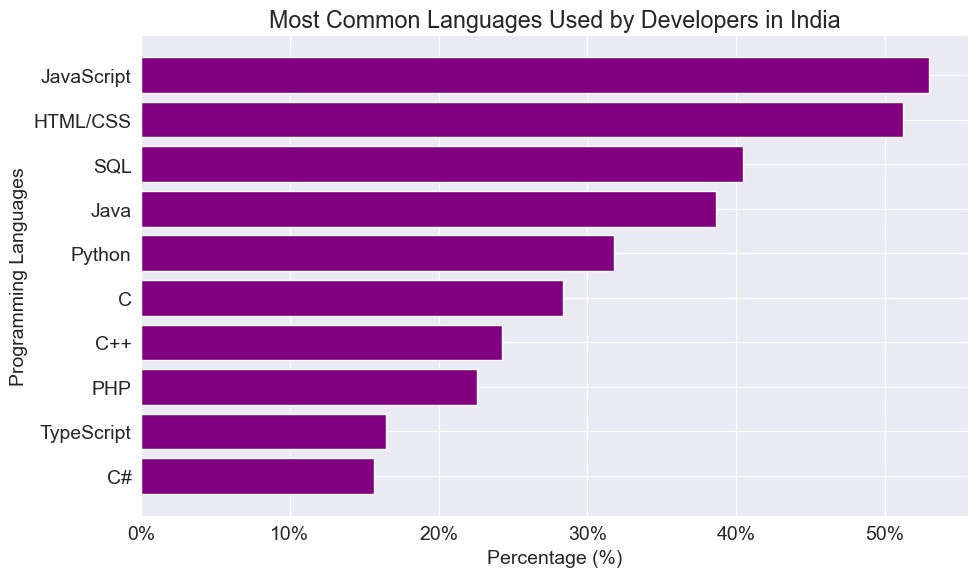

In [473]:
# Data for common languages used by developers in India
languages_your_country = common_languages_your_country.index[::-1]  # Reverse the order to descending
percentages_your_country = common_languages_your_country.values[::-1]  # Reverse the order to descending

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(languages_your_country, percentages_your_country, color='purple')
plt.xlabel('Percentage (%)')
plt.ylabel('Programming Languages')
plt.title("Most Common Languages Used by Developers in India")
plt.gca().xaxis.set_major_formatter('{:.0f}%'.format)

# Display the plot
plt.tight_layout()
plt.show()

#### Q: Which languages are the most people interested to learn over the next year?

In [474]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

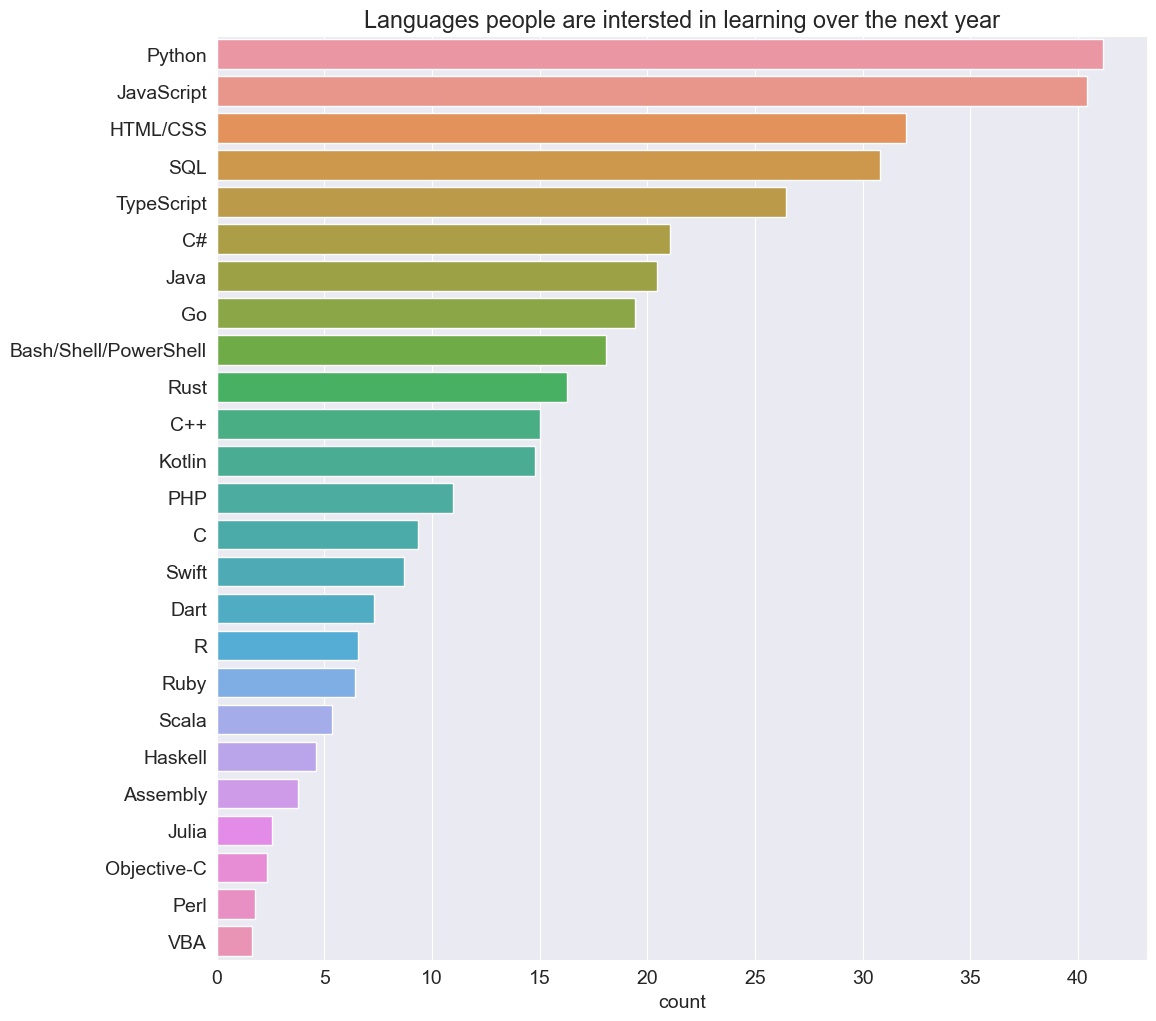

In [475]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

In [516]:
# Filter respondents who are students
students_df = survey_df[survey_df['Employment'] == 'Student']

# Calculate the languages students are interested in learning/using
students_languages_interest = students_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Filter respondents who are professional developers
pro_devs_df = survey_df[survey_df['EmploymentType'] == 'Professional']

# Calculate the languages professional developers are interested in learning/using
pro_devs_languages_interest = pro_devs_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Compare the two lists
languages_interest_students = students_languages_interest.head(10)
languages_interest_pro_devs = pro_devs_languages_interest.head(10)

print("Languages Students Are Interested in Learning/Using:")
print(languages_interest_students)

print("\nLanguages Professional Developers Are Interested in Learning/Using:")
print(languages_interest_pro_devs)


Languages Students Are Interested in Learning/Using:
Python        12.315197
JavaScript     9.382434
HTML/CSS       7.774533
C++            7.295775
Java           7.205444
SQL            6.305140
C#             5.263316
C              4.661106
Rust           4.082985
TypeScript     4.079974
Name: proportion, dtype: float64

Languages Professional Developers Are Interested in Learning/Using:
JavaScript               11.245978
Python                   11.139121
SQL                       8.765239
HTML/CSS                  8.715057
TypeScript                7.944623
C#                        5.963338
Go                        5.708888
Java                      5.388907
Bash/Shell/PowerShell     5.192313
Rust                      4.619063
Name: proportion, dtype: float64


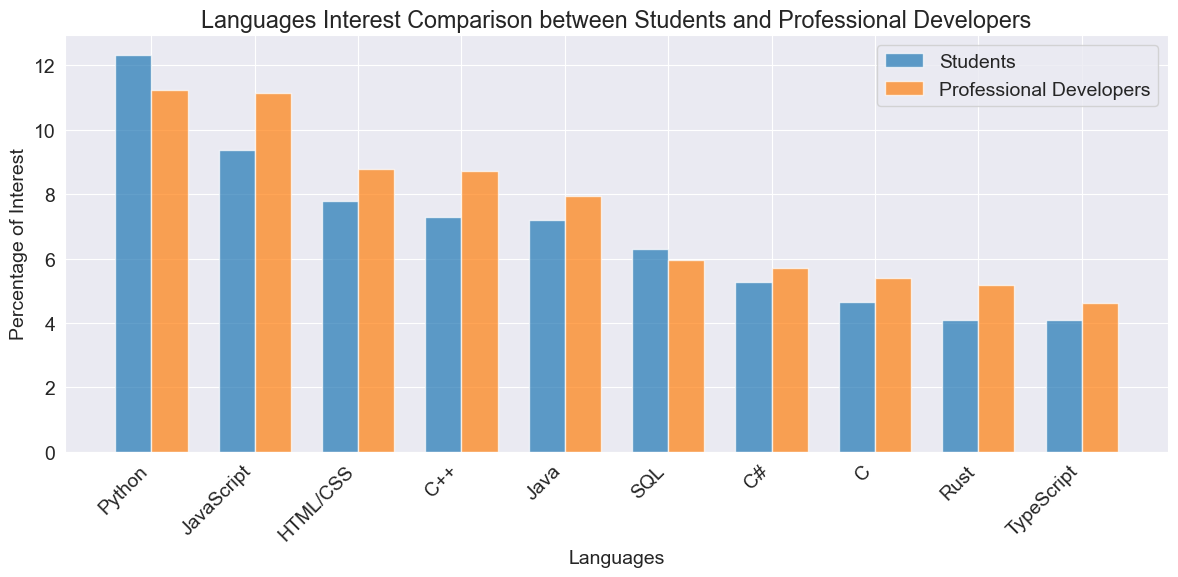

In [517]:
# Data for students and professional developers
languages_students = languages_interest_students.index
interest_students = languages_interest_students.values
languages_pro_devs = languages_interest_pro_devs.index
interest_pro_devs = languages_interest_pro_devs.values

# Set the width of the bars
bar_width = 0.35

# Create positions for the bars on the x-axis
x_students = range(len(languages_students))
x_pro_devs = [x + bar_width for x in x_students]

# Create the double bar graph
plt.figure(figsize=(12, 6))
plt.bar(x_students, interest_students, width=bar_width, label='Students', alpha=0.7)
plt.bar(x_pro_devs, interest_pro_devs, width=bar_width, label='Professional Developers', alpha=0.7)

# Labeling the x-axis with languages
plt.xlabel('Languages')
plt.xticks([x + bar_width / 2 for x in x_students], languages_students, rotation=45, ha='right')

# Labeling the y-axis
plt.ylabel('Percentage of Interest')
plt.title('Languages Interest Comparison between Students and Professional Developers')

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [479]:
# Filter respondents who are not "Developer, front-end"
non_frontend_devs_df = survey_df[~survey_df['DevType'].str.contains('Developer, front-end', na=False)]

# Calculate the languages non "Developer, front-end" respondents are interested in learning/using
non_frontend_devs_languages_interest = non_frontend_devs_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Get the top languages
languages_interest_non_frontend_devs = non_frontend_devs_languages_interest.head(10)
print("Languages Non 'Developer, front-end' Respondents Are Interested in Learning/Using:")
print(languages_interest_non_frontend_devs)


Languages Non 'Developer, front-end' Respondents Are Interested in Learning/Using:
Python                   12.218087
JavaScript                9.700153
SQL                       8.360572
HTML/CSS                  7.216229
Java                      6.134235
TypeScript                5.743760
C#                        5.657478
Go                        5.471058
Bash/Shell/PowerShell     5.253147
C++                       4.791505
Name: proportion, dtype: float64


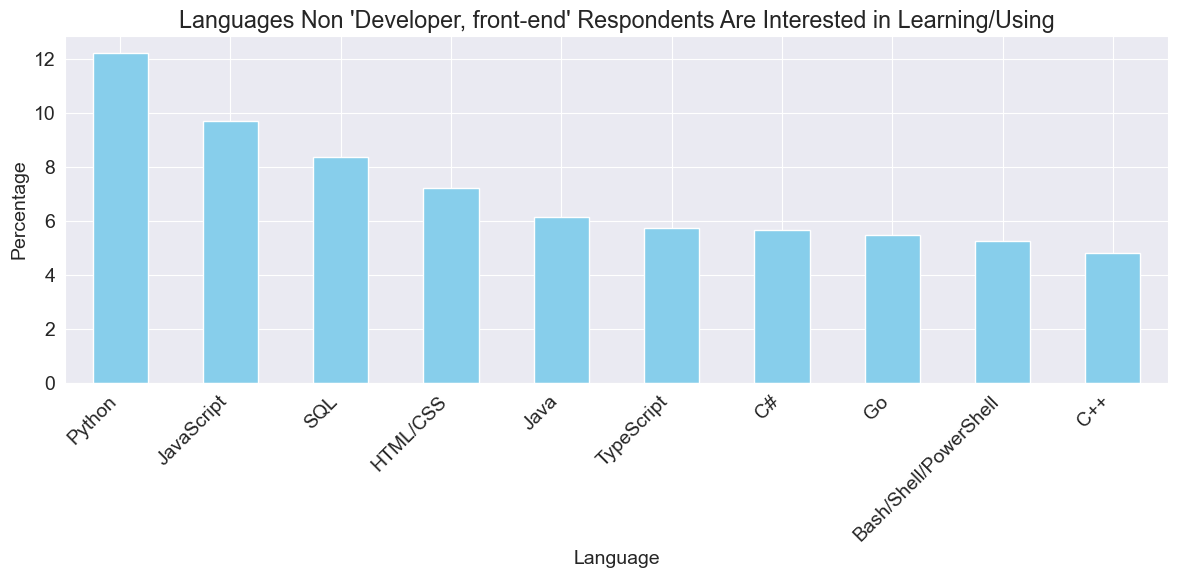

In [480]:
# We have already calculated the 'languages_interest_non_frontend_devs' DataFrame

# Create a bar plot
plt.figure(figsize=(12, 6))
languages_interest_non_frontend_devs.plot(kind='bar', color='skyblue')
plt.title("Languages Non 'Developer, front-end' Respondents Are Interested in Learning/Using")
plt.xlabel("Language")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [481]:
# Filter respondents in fields related to data science
data_sci_related_df = survey_df[survey_df['DevType'].str.contains('Data scientist', na=False)]

# Calculate the languages data science-related respondents are interested in learning/using
data_sci_languages_interest = data_sci_related_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Get the top languages
languages_interest_data_sci_related = data_sci_languages_interest.head(10)
print("Languages Data Science-Related Respondents Are Interested in Learning/Using:")
print(languages_interest_data_sci_related)


Languages Data Science-Related Respondents Are Interested in Learning/Using:
Python                   16.156536
SQL                       9.311170
JavaScript                7.624364
Bash/Shell/PowerShell     6.097037
R                         5.986628
HTML/CSS                  5.796479
Go                        5.213764
C++                       5.201497
Rust                      4.281421
Java                      4.060602
Name: proportion, dtype: float64


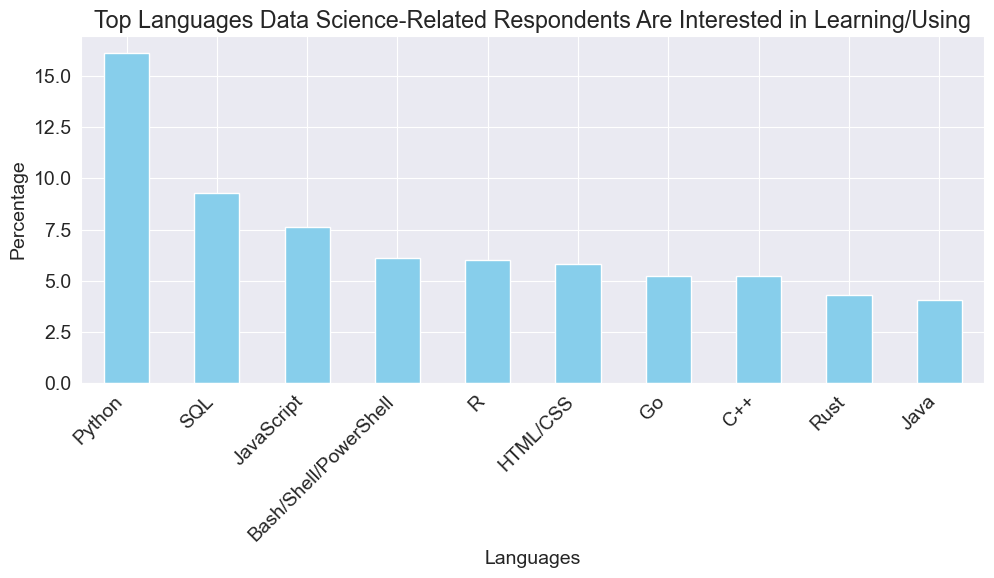

In [482]:
# We have already calculated the 'languages_interest_data_sci_related' DataFrame

# Create a bar plot
plt.figure(figsize=(10, 6))
languages_interest_data_sci_related.plot(kind='bar', color='skyblue')
plt.title("Top Languages Data Science-Related Respondents Are Interested in Learning/Using")
plt.xlabel("Languages")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [483]:
# Filter respondents older than 35 years of age
older_devs_df = survey_df[survey_df['Age'] > 35]

# Calculate the languages older developers are interested in learning/using
older_devs_languages_interest = older_devs_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Get the top languages
languages_interest_older_devs = older_devs_languages_interest.head(10)
print("Languages Developers Older Than 35 Are Interested in Learning/Using:")
print(languages_interest_older_devs)


Languages Developers Older Than 35 Are Interested in Learning/Using:
JavaScript               11.083512
Python                   10.257826
SQL                       9.931231
HTML/CSS                  9.399940
C#                        7.083880
TypeScript                6.791785
Bash/Shell/PowerShell     6.219094
Go                        4.873617
Java                      4.855217
Rust                      4.427425
Name: proportion, dtype: float64


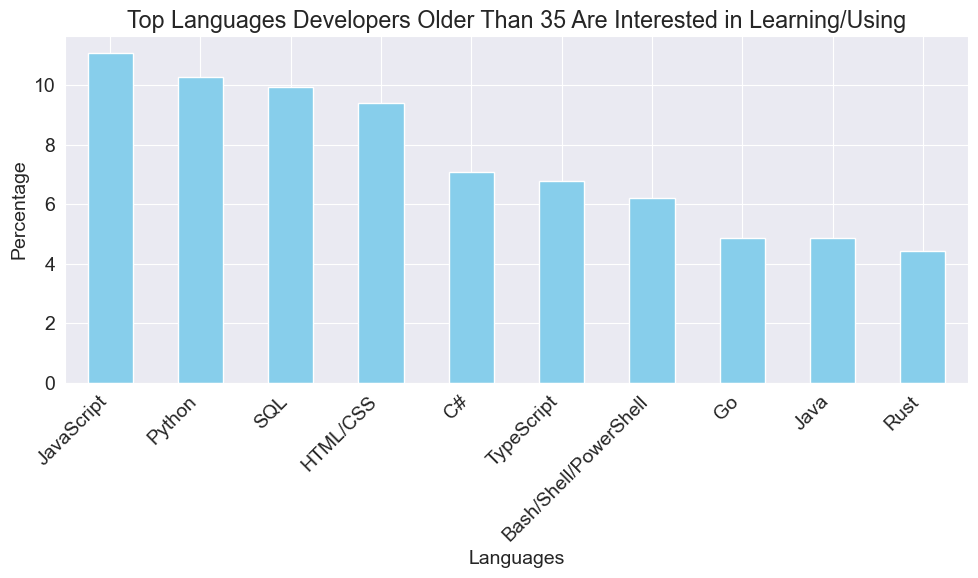

In [484]:
# We have already calculated the 'languages_interest_older_devs' DataFrame

# Create a bar plot
plt.figure(figsize=(10, 6))
languages_interest_older_devs.plot(kind='bar', color='skyblue')
plt.title("Top Languages Developers Older Than 35 Are Interested in Learning/Using")
plt.xlabel("Languages")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [485]:
# Filter respondents in your home country
your_country_devs_df = survey_df[survey_df['Country'] == 'India']

# Calculate the languages developers in your home country are interested in learning/using
your_country_devs_languages_interest = your_country_devs_df['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts(normalize=True) * 100

# Get the top languages
languages_interest_your_country = your_country_devs_languages_interest.head(10)
print("Languages Developers in India Are Interested in Learning/Using:")
print(languages_interest_your_country)


Languages Developers in India Are Interested in Learning/Using:
Python        13.651852
JavaScript    11.830872
HTML/CSS       8.075331
SQL            7.851830
Java           7.331550
TypeScript     6.404573
Go             5.631481
Kotlin         4.774118
C++            3.645623
PHP            3.389147
Name: proportion, dtype: float64


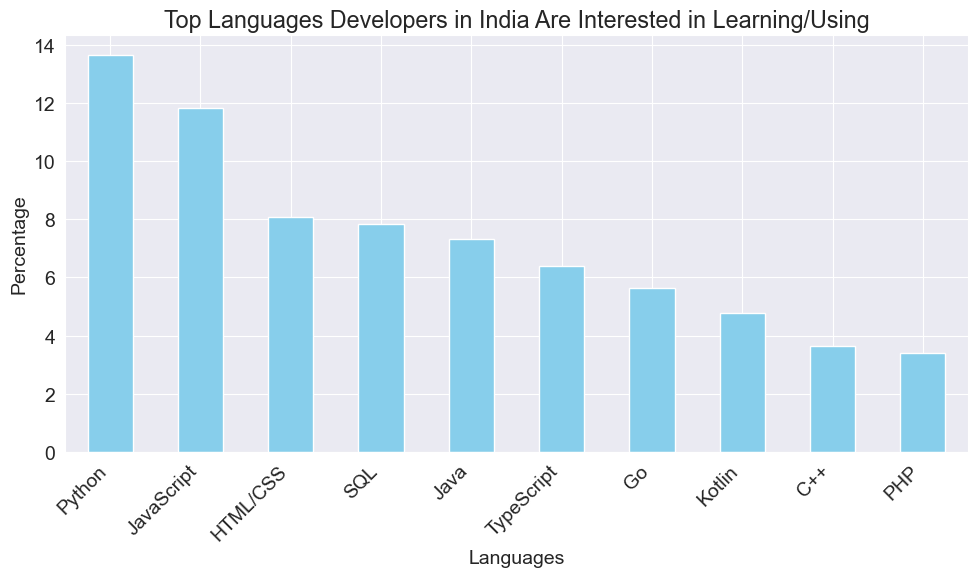

In [486]:
# We have already calculated the 'languages_interest_your_country' DataFrame

# Create a bar plot
plt.figure(figsize=(10, 6))
languages_interest_your_country.plot(kind='bar', color='skyblue')
plt.title("Top Languages Developers in India Are Interested in Learning/Using")
plt.xlabel("Languages")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?


- Make a new data frame, languages_loved_df, with a True value for a language only if the equivalent values in languages_worked_df and languages_interested_df are both True.

- To get the percentage of respondents who "love" the language, multiply the column-wise sum of languages_loved_df by the column-wise total of languages_worked_df.

- Sort the results in decreasing order and make a horizontal bar graph out of them.


In [487]:
languages_loved_df = languages_worked_df & languages_interested_df

In [488]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

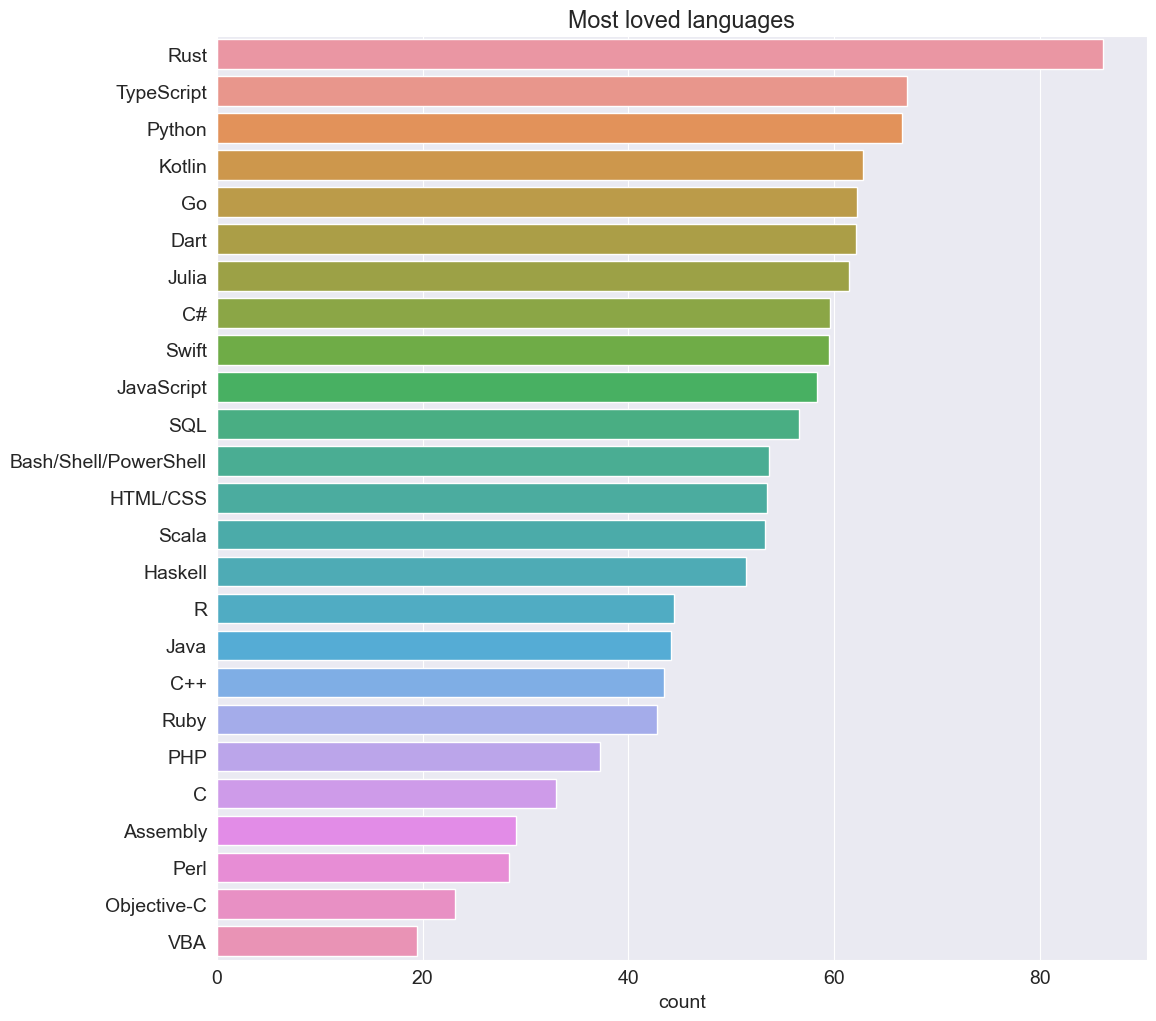

In [489]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

In [490]:
# Calculate the languages people have used in the past year
languages_worked_df = split_multicolumn(survey_df['LanguageWorkedWith'])

# Calculate the languages people are interested in learning/using next year
languages_interested_df = split_multicolumn(survey_df['LanguageDesireNextYear'])

# Identify the most dreaded languages
dreaded_languages = languages_worked_df.columns[~languages_worked_df.isin(languages_interested_df).all()]
dreaded_languages_count = languages_worked_df[dreaded_languages].sum().sort_values(ascending=False)

print("Most Dreaded Languages:")
print(dreaded_languages_count)


Most Dreaded Languages:
JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64


#### What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year

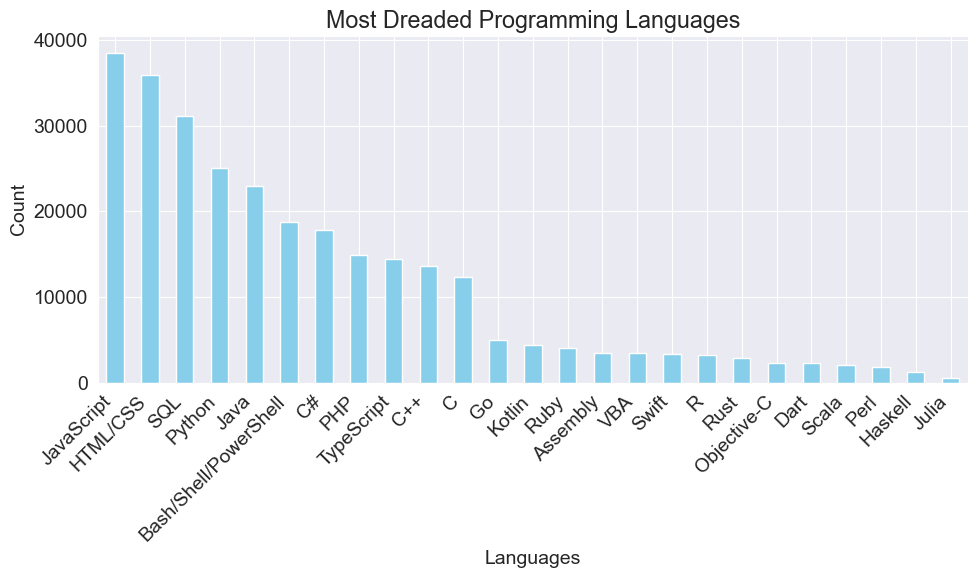

In [491]:
# We have already calculated the 'dreaded_languages_count' DataFrame

# Create a bar plot for the most dreaded languages
plt.figure(figsize=(10, 6))
dreaded_languages_count.plot(kind='bar', color='skyblue')
plt.title("Most Dreaded Programming Languages")
plt.xlabel("Languages")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [492]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [493]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [494]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Working hours in Asian countries such as Iran, China, and Israel are the longest, followed by the United States. However, there isn't much fluctuation overall, and the typical working week appears to be around 40 hours.





#### Q. Which role has the highest average number of hours worked per week? Which one has the lowest?

In [495]:
# Group the data by 'DevType' and calculate the average work hours per role
average_work_hours_per_role = survey_df.groupby('DevType')['WorkWeekHrs'].mean()

# Find the role with the highest average work hours
highest_avg_hours_role = average_work_hours_per_role.idxmax()
highest_avg_hours = average_work_hours_per_role.max()

# Find the role with the lowest average work hours
lowest_avg_hours_role = average_work_hours_per_role.idxmin()
lowest_avg_hours = average_work_hours_per_role.min()

# Organized output
print("Role with the Highest Average Work Hours:")
print(f"Role: {highest_avg_hours_role}")
print(f"Highest Average Work Hours: {highest_avg_hours:.2f} hours/week")

print("\nRole with the Lowest Average Work Hours:")
print(f"Role: {lowest_avg_hours_role}")
print(f"Lowest Average Work Hours: {lowest_avg_hours:.2f} hours/week")

Role with the Highest Average Work Hours:
Role: Data or business analyst;Developer, back-end;DevOps specialist;Product manager;System administrator
Highest Average Work Hours: 140.00 hours/week

Role with the Lowest Average Work Hours:
Role: Academic researcher;Data or business analyst;Database administrator;Designer;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, full-stack;Engineering manager;Product manager
Lowest Average Work Hours: 1.00 hours/week


#### Q. How do the hours worked compare between freelancers and developers working full-time?

In [554]:
# Group the data by 'Employment' and calculate the average work hours per employment type
average_work_hours_by_employment = survey_df.groupby('Employment')['WorkWeekHrs'].mean()

# Extract the average work hours for freelancers and full-time developers
average_work_hours_freelancers = average_work_hours_by_employment.get('Independent contractor, freelancer, or self-employed', 0)  # Default to 0 if 'Freelancer' not found
average_work_hours_full_time = average_work_hours_by_employment.get('Employed full-time', 0)  # Default to 0 if 'Employed full-time' not found

# Print the results
print("\nAverage Work Hours for Freelancers:", average_work_hours_freelancers)
print("Average Work Hours for Full-time Developers:", average_work_hours_full_time)

# Compare the average work hours between freelancers and full-time developers
if average_work_hours_freelancers > average_work_hours_full_time:
    print("Freelancers work more hours on average.")
elif average_work_hours_freelancers < average_work_hours_full_time:
    print("Full-time Developers work more hours on average.")
else:
    print("Freelancers and Full-time Developers work the same number of hours on average.")


Average Work Hours for Freelancers: 40.114209320091675
Average Work Hours for Full-time Developers: 40.42407210335335
Full-time Developers work more hours on average.


#### Q: How important is it to start young to build a career in programming?

We will create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience)

In [558]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

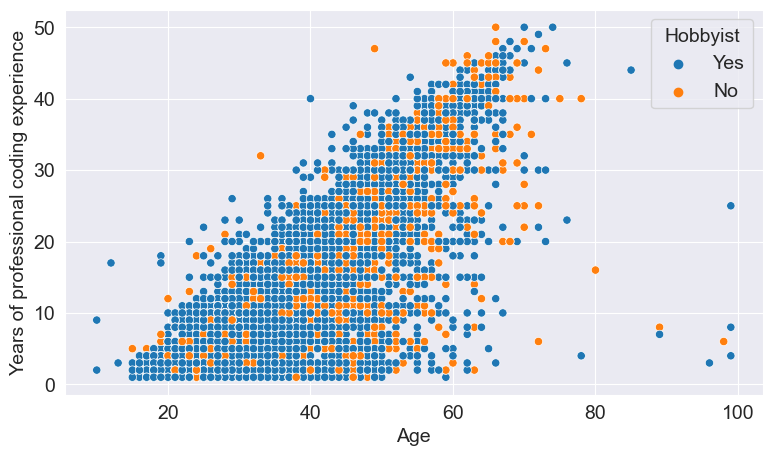

In [559]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

Points can be seen all around the graph, indicating that you can **begin programming professionally at any age**. Many people who have been coding professionally for decades appear to like it as a pastime.



Looking at Age1stCode column column distribution to discover when respondents first tried programming.

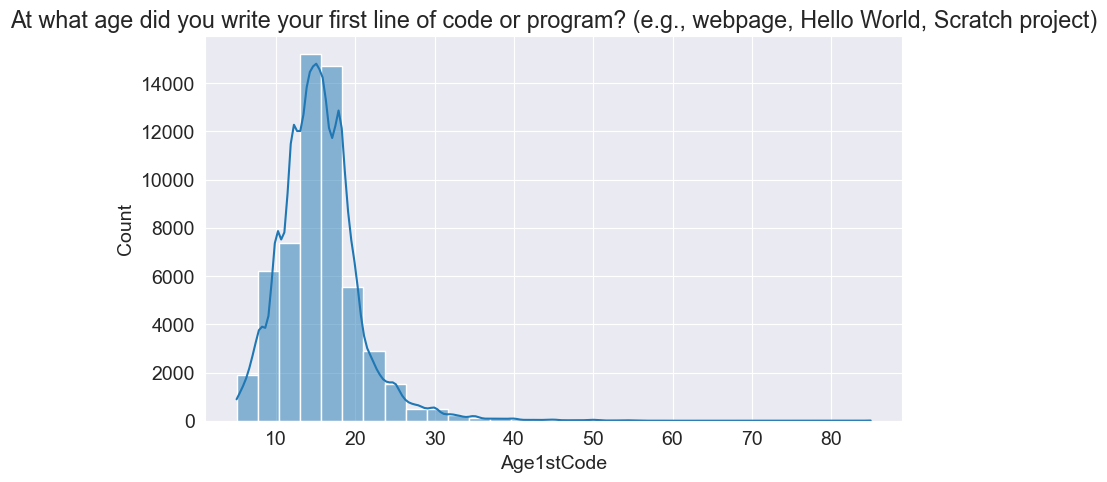

In [560]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As may be expected, most persons appear to have had some programming experience before the age of 40. However, people of different ages and backgrounds are learning to code.




#### Q. How does programming experience affect preferences and opinions? Compare the opinions of people with and without more than ten years of professional programming experience. Do you notice any noteworthy trends?



In [562]:
# Create two groups based on programming experience
experienced_programmers = survey_df[survey_df['YearsCodePro'] > 10]
inexperienced_programmers = survey_df[survey_df['YearsCodePro'] <= 10]

In [569]:
# Compare job satisfaction between experienced and inexperienced programmers
job_satisfaction_experienced = experienced_programmers['JobSat'].value_counts(normalize=True)
job_satisfaction_inexperienced = inexperienced_programmers['JobSat'].value_counts(normalize=True)

print("Job Satisfaction for More Than 10 Years of Experience:")
print(job_satisfaction_experienced)

print("\nJob Satisfaction for 10 or Fewer Years of Experience:")
print(job_satisfaction_inexperienced)

Job Satisfaction for More Than 10 Years of Experience:
JobSat
Very satisfied                        0.363145
Slightly satisfied                    0.286965
Slightly dissatisfied                 0.151297
Neither satisfied nor dissatisfied    0.111038
Very dissatisfied                     0.087554
Name: proportion, dtype: float64

Job Satisfaction for 10 or Fewer Years of Experience:
JobSat
Slightly satisfied                    0.317658
Very satisfied                        0.305147
Slightly dissatisfied                 0.163309
Neither satisfied nor dissatisfied    0.133840
Very dissatisfied                     0.080045
Name: proportion, dtype: float64


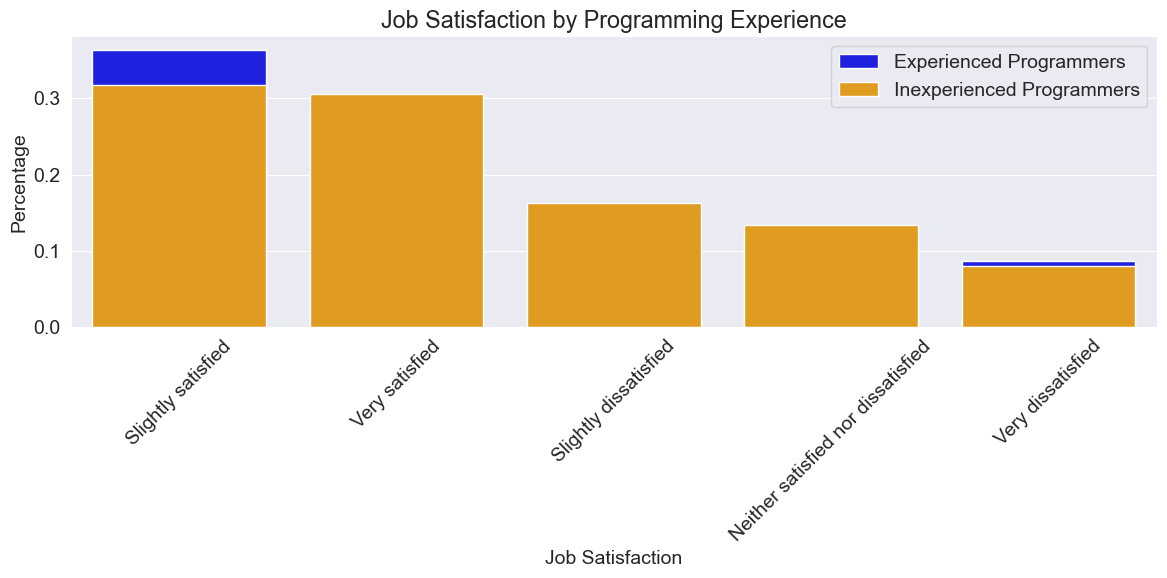

In [570]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=job_satisfaction_experienced.index, y=job_satisfaction_experienced.values, label='Experienced Programmers', color='blue')
sns.barplot(x=job_satisfaction_inexperienced.index, y=job_satisfaction_inexperienced.values, label='Inexperienced Programmers', color='orange')
plt.title('Job Satisfaction by Programming Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We compare job satisfaction between experienced and inexperienced programmers by creating a bar plot that visualizes the distribution of job satisfaction levels in each group.

#### Q. Compare how long each gender's professional coding experience spans.


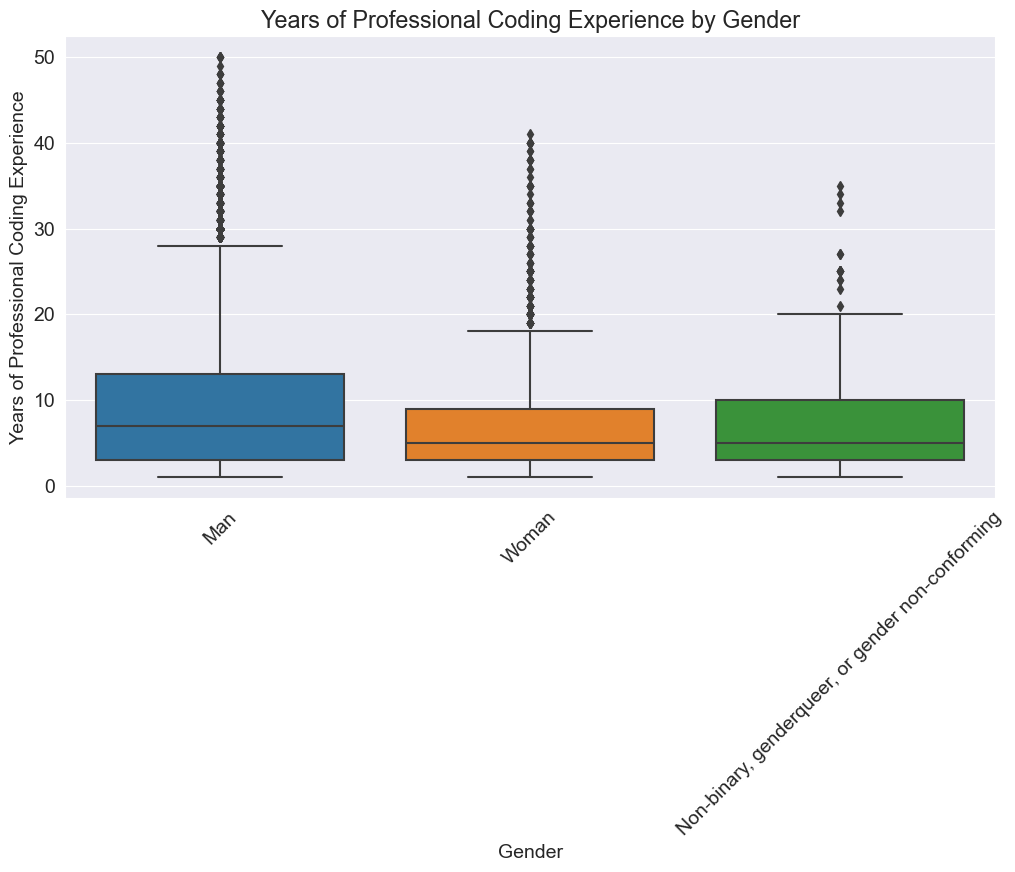

In [574]:
# Filter out rows where 'YearsCodePro' is missing
survey_df = survey_df.dropna(subset=['YearsCodePro'])

# Create a box plot to compare years of professional coding experience by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=survey_df, x='Gender', y='YearsCodePro')
plt.title('Years of Professional Coding Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)

plt.show()

This box plot visually shows the central tendency and spread of years of experience for each gender category, allowing us to compare the distributions and identify any differences in professional coding experience between genders.






## Conclusion

The Analysis provided us with numerous insights. Here's a rundown of a handful of them:

- Based on the demographics of the survey respondents, we can conclude that the poll is relatively representative of the larger programming community. However, it received fewer responses from programmers in non-English-speaking nations, as well as from women and non-binary genders.


- The programming community is not as diverse as it could be. Although things are improving, we should make more efforts to promote and encourage marginalised communities, regardless of age, country, ethnicity, gender, or other factors.


- Although the majority of programmers have a college degree, a sizable proportion did not major in computer science. As a result, a computer science degree is not required for learning to code or pursuing a career in programming.


- A considerable proportion of programmers work part-time or as freelancers, which can be an excellent way to break into the sector, especially if you're just starting out.


- In 2020, the most popular programming languages will be Javascript and HTML/CSS, closely followed by SQL and Python.


- Python is the language that most people want to learn since it is a simple general-purpose programming language that can be used in a variety of domains.


- In 2020, the most "loved" languages are Rust and TypeScript, both of which have tiny but rapidly expanding communities. Despite being a widely used language, Python comes in third place.


- Programmers worldwide appear to work an average of 40 hours per week, with modest differences per country.


- At any age, you can learn and begin a career in programming. If you enjoy programming as a pastime, you're more likely to have a long and satisfying career.
